### Provocações (espaço para inserir possíveis perguntas de negócio/próximos passos)

**POSSÍVEIS PERGUNTAS DE NEGÓCIO**

1. Como a nota de corte varia por curso, ano e região?
  - **Quais fatores influenciam a nota de corte dos cursos na UFABC?**
  - Evolução das notas de corte ao longo dos anos
  - Diferenças regionais

2. Análise do perfil dos estudantes
  - **Qual perfil consegue superar a nota de corte?**
  - Perfil socioeconômico, tipo de escola...
  - Desempenho por área de conhecimento

---

**PRÓXIMOS PASSOS**

1. Usar a API do Gemini (que é aberta) para categorizar os valores dos campos das bases do perfil discente de graduação da UFABC, para agrupar os estudantes por ano, fazendo inferências - apesar de que as amostras lá representadas compõem basicamente toda a população de estudantes. Em seguida, combinar com as análises das tabelas cruzadas (ENEM + ingresso na ufabc).

2. Como nas bases do perfil discente não há identificadores dos estudantes, convém utilizar apenas a base mais recente - do ano de 2023 para traçar o perfil dos estudantes, e fazer inferências extrapolando para toda a população - melhor não usar a partir de 2024, visto que há limitação dos microdados/dados do MEC (apenas de 2023 para trás)

  - Uma outra ideia pode ser utilizar todas as bases, e comparar os resultados. Mas acho melhor usar apenas a de 2023 (validar).

3. Verificar o que fazer com os microdados do ENEM - se usamos ou não, visto que o cruzamento não deu certo

### Setup (bibliotecas, funções auxiliares e constantes - caminhos das bases)

#### Importação de bibliotecas

In [ ]:
!pip install dtype_diet
#!pip install google.generativeai
#from rpy2.robjects import r
import numpy as np
#import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
from dtype_diet import optimize_dtypes, report_on_dataframe
import seaborn as sns
from matplotlib.patches import ConnectionPatch
#import google.generativeai as genai
#from scipy.stats import shapiro

#### Funções auxiliares

Funções de otimização de memória de dataframes.

In [ ]:
# Leitura de bases CSV do Google Drive, a partir de URLs inteiras

# Esta função funciona apenas para arquivos csv pequenos
def converte_url_drive_csv(url: str) -> str:
    '''
    Converte uma url de um arquivo CSV do Google Drive para uma url
    de um arquivo CSV legível pela biblioteca Pandas do Python.
    '''
    file_id_start = url.find('/d/') + 3
    file_id_end = url.find('/view')
    file_id = url[file_id_start : file_id_end]
    return f'https://drive.google.com/uc?export=download&id={file_id}'

# Otimização da memória ocupada por um dataframe

def otimiza_memoria_df(df, file_name):
    df_opt = report_on_dataframe(df, unit='MB')
    df_opt_ = optimize_dtypes(df, df_opt)
    df_opt_.to_parquet(f"{file_name}.parquet", compression='gzip')

#### Constantes - caminhos das bases de dados

In [ ]:
# Versão Google Colab
from google.colab import drive
drive.mount('/content/drive')

# 1. Bases de dados dos processos seletivos da UFABC - anos de 2020 a 2023
CAMINHO_PROGRAD_INGRESSO = r'/content/drive/MyDrive/UFABC/Hackathons/I Hackathon DATAS – Qual a nota de corte?/Bases Otimizadas/Parquets/df_ingresso_ufabc_2020_a_2023.parquet'

# 2. Bases de dados dos microdados do ENEM - anos de 2020 a 2023
CAMINHO_MICRODADOS_ENEM = r'/content/drive/MyDrive/UFABC/Hackathons/I Hackathon DATAS – Qual a nota de corte?/Bases Otimizadas/Parquets/df_microdados_ENEM_2020_a_2023.parquet'

# 3. Bases de dados do perfil discente de graduação da UFABC - anos de 2020 a 2023
CAMINHO_PERFIL_DISCENTE_UFABC = r"/content/drive/MyDrive/UFABC/Hackathons/I Hackathon DATAS – Qual a nota de corte?/Bases Otimizadas/CSVs/df_perfil_discente_ufabc_2020_a_2023.csv"

# 4. Bases de dados do MEC - anos de 2020 a 2023
CAMINHO_DADOS_MEC = r"/content/drive/MyDrive/UFABC/Hackathons/I Hackathon DATAS – Qual a nota de corte?/Bases Otimizadas/Parquets/df_dados_MEC_2020_a_2023.parquet"

# 5. Base de dados do MEC + UFABC - anos de 2020 a 2023
CAMINHO_BASE_FINAL_LIMPA =  r"/content/drive/MyDrive/UFABC/Hackathons/I Hackathon DATAS – Qual a nota de corte?/Bases Otimizadas/CSVs/df_base_final_limpa_ufabc_mec.csv"

'''
# Versão local

# Todos os caminhos aqui escritos referem-se ao caminho das bases no google drive
# e devem ser adaptados para o ambiente local de cada usuário.

# 1. Bases de dados dos processos seletivos da UFABC - anos de 2020 a 2023
CAMINHO_PROGRAD_INGRESSO = r'.\Bases Otimizadas\Parquets\df_ingresso_ufabc_2020_a_2023.parquet'

# 2. Bases de dados dos microdados do ENEM - anos de 2020 a 2023
CAMINHO_MICRODADOS_ENEM = r'.\Bases Otimizadas\Parquets\df_microdados_ENEM_2020_a_2023.parquet'

# 3. Bases de dados do perfil discente de graduação da UFABC - anos de 2020 a 2023
CAMINHO_PERFIL_DISCENTE_UFABC = r".\Bases Otimizadas\CSVs\df_perfil_discente_ufabc_2020_a_2023.csv"

# 4. Bases de dados do MEC - anos de 2020 a 2023
CAMINHO_DADOS_MEC = r".\Bases Otimizadas\Parquets\df_dados_MEC_2020_a_2023.parquet"

# 5. Base de dados do MEC + UFABC - anos de 2020 a 2023 (csv)
CAMINHO_BASE_FINAL_LIMPA =  r".\Bases Otimizadas\CSVs\df_base_final_limpa_ufabc_mec.csv"
'''

Mounted at /content/drive


'\n# Versão local\n\n# Todos os caminhos aqui escritos referem-se ao caminho das bases no google drive\n# e devem ser adaptados para o ambiente local de cada usuário.\n\n# 1. Bases de dados dos processos seletivos da UFABC - anos de 2020 a 2023\nCAMINHO_PROGRAD_INGRESSO = r\'.\\Bases Otimizadas\\Parquets\\df_ingresso_ufabc_2020_a_2023.parquet\'\n\n# 2. Bases de dados dos microdados do ENEM - anos de 2020 a 2023\nCAMINHO_MICRODADOS_ENEM = r\'.\\Bases Otimizadas\\Parquets\\df_microdados_ENEM_2020_a_2023.parquet\'\n\n# 3. Bases de dados do perfil discente de graduação da UFABC - anos de 2020 a 2023\nCAMINHO_PERFIL_DISCENTE_UFABC = r".\\Bases Otimizadas\\CSVs\\df_perfil_discente_ufabc_2020_a_2023.csv"\n\n# 4. Bases de dados do MEC - anos de 2020 a 2023\nCAMINHO_DADOS_MEC = r".\\Bases Otimizadas\\Parquets\\df_dados_MEC_2020_a_2023.parquet"\n\n# 5. Base de dados do MEC + UFABC - anos de 2020 a 2023 (csv)\nCAMINHO_BASE_FINAL_LIMPA =  r".\\Bases Otimizadas\\CSVs\\df_base_final_limpa_ufabc_mec.

### Pré-processamento 1 (leitura de dados e otimização de memória)

#### Bases com os dados da <b>prograd.UFABC</b> referentes aos processos seletivos dos anos de $2020$ a $2023$

##### Leitura das bases de dados e transformação

In [ ]:
# Usando o dataframe otimizado
df_ingresso_ufabc_geral = pd.read_parquet(CAMINHO_PROGRAD_INGRESSO)

# Limpando as colunas de string - padronizando o formato
df_ingresso_ufabc_geral['opção de campus'] = df_ingresso_ufabc_geral['opção de campus'].str.strip().str.upper()

df_ingresso_ufabc_geral['opção de curso'] = df_ingresso_ufabc_geral['opção de curso'].\
    str.strip().str.upper()

df_ingresso_ufabc_geral.loc[df_ingresso_ufabc_geral['opção de curso'] == 'CIÊNCIA E TECNOLOGIA', 'opção de curso'] = 'BACHARELADO EM CIÊNCIA E TECNOLOGIA'
df_ingresso_ufabc_geral.loc[df_ingresso_ufabc_geral['opção de curso'] == 'CIÊNCIAS E HUMANIDADES', 'opção de curso'] = 'BACHARELADO EM CIÊNCIAS E HUMANIDADES'
df_ingresso_ufabc_geral.loc[df_ingresso_ufabc_geral['opção de curso'] == 'CIÊNCIAS HUMANAS', 'opção de curso'] = 'LICENCIATURA EM CIÊNCIAS HUMANAS'
df_ingresso_ufabc_geral.loc[df_ingresso_ufabc_geral['opção de curso'] == 'CIÊNCIAS NATURAIS E EXATAS', 'opção de curso'] = 'LICENCIATURA EM CIÊNCIAS NATURAIS E EXATAS'

df_ingresso_ufabc_geral['opção de turno'] = df_ingresso_ufabc_geral['opção de turno'].str.strip().str.upper()

##### Processo de otimização de memória das bases de dados

In [ ]:
# Leitura inicial
#df_ingresso_ufabc_2020
#df_ingresso_ufabc_2021
#df_ingresso_ufabc_2022
#df_ingresso_ufabc_2023

# Adicionando uma coluna de anos para cada base 'modalidade convocação'

#df_ingresso_ufabc_2020['ano do processo seletivo'] = 2020
#df_ingresso_ufabc_2021['ano do processo seletivo'] = 2021
#df_ingresso_ufabc_2022['ano do processo seletivo'] = 2022
#df_ingresso_ufabc_2023['ano do processo seletivo'] = 2023

# Criando uma base com todos os anos juntos
#df_ingresso_ufabc_geral = dd.concat([df_ingresso_ufabc_2020,
#                                     df_ingresso_ufabc_2021,
#                                     df_ingresso_ufabc_2022,
#                                     df_ingresso_ufabc_2023])

# A nota está seguindo o padrão numérico brasileiro
#df_ingresso_ufabc_geral['nota'] = df_ingresso_ufabc_geral['nota'].str.replace(',', '.').astype(float)

# Não importa saber qual é o código da modalidade/inscrição
#df_ingresso_ufabc_geral['modalidade convocação'] = df_ingresso_ufabc_geral['modalidade convocação'].str.extract(r'-\s*(.*)', expand=False).fillna(df_ingresso_ufabc_geral['modalidade convocação'])
#df_ingresso_ufabc_geral['modalidade inscrição'] = df_ingresso_ufabc_geral['modalidade inscrição'].str.extract(r'-\s*(.*)', expand=False).fillna(df_ingresso_ufabc_geral['modalidade inscrição'])

# Passando para pandas
#df_ingresso_ufabc_geral = df_ingresso_ufabc_geral.compute()

# Otimizando a memória
#otimiza_memoria_df(df=df_ingresso_ufabc_geral, file_name="df_ingresso_ufabc_2020_a_2023")

##### Primeiras linhas da base

In [ ]:
df_ingresso_ufabc_geral.head()

,inscrição no ENEM,nome candidato,opção de curso,opção de campus,opção de turno,modalidade inscrição,nota,classificação original,classificação atual,status de matrícula,chamada,modalidade convocação,ano do processo seletivo
0,"1,9104E+11",THOMAS HENRIQUE NAVARRO,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,Ampla concorrência,791.06,1,0,Matriculado(a),Chamada Regular,Ampla concorrência,2020
1,"1,91037E+11",GIOVANNA RIBEIRO GUSMAO,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,Ampla concorrência,790.32,2,0,Não Compareceu,Chamada Regular,Ampla concorrência,2020
2,"1,91002E+11",DIEGO PIRES FACCIOLO,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,Ampla concorrência,789.74,3,0,Não Compareceu,Chamada Regular,Ampla concorrência,2020
3,"1,91035E+11",JOAO PEDRO KAYANO LEAL,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,Ampla concorrência,788.89,4,0,Matriculado(a),Chamada Regular,Ampla concorrência,2020
4,"1,91049E+11",PAULO RAFAEL CARNEIRO,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,Ampla concorrência,788.86,5,0,Não Compareceu,Chamada Regular,Ampla concorrência,2020


In [ ]:
df_com_asterisco_no_nome = df_ingresso_ufabc_geral[
    df_ingresso_ufabc_geral['nome candidato'].astype(str).str.contains('\*')
]

df_com_asterisco_no_nome

<>:2: SyntaxWarning: invalid escape sequence '\*'
<>:2: SyntaxWarning: invalid escape sequence '\*'
C:\Users\Bruno\AppData\Local\Temp\ipykernel_15996\2394182971.py:2: SyntaxWarning: invalid escape sequence '\*'
  df_ingresso_ufabc_geral['nome candidato'].astype(str).str.contains('\*')


,inscrição no ENEM,nome candidato,opção de curso,opção de campus,opção de turno,modalidade inscrição,nota,classificação original,classificação atual,status de matrícula,chamada,modalidade convocação,ano do processo seletivo
1398,"1,91013E+11",B****** W****** K***,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,Refugiado,680.93,1,0,Matriculado(a),Chamada Regular,Refugiado,2020
1399,"1,91003E+11",L**** V******* M***** B******,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,Pessoa Transgênera + Renda,601.24,1,0,Matriculado(a),Chamada Regular,Pessoa Transgênera + Renda,2020
1400,"1,91033E+11",D***** L**** F********,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,Pessoa Transgênera + Renda,580.28,2,0,Matriculado(a),Chamada Regular,Pessoa Transgênera + Renda,2020
1401,"1,91004E+11",A** B****** V***** D* M**** F******,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,Pessoa Transgênera + Renda,541.88,3,0,Matriculado(a),Chamada Regular,Pessoa Transgênera + Renda,2020
1402,"1,91003E+11",E***** S**** O*******,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,Pessoa Transgênera + Renda,508.25,4,0,Matriculado(a),Chamada Regular,Pessoa Transgênera + Renda,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4407,22****125259,L******* S******* G****,BACHARELADO EM CIÊNCIAS E HUMANIDADES,SÃO BERNARDO DO CAMPO,NOTURNO,Pessoa Transgênera,637.82,2,0,Matriculado(a),Chamada Regular,Pessoa Transgênera,2023
4408,22****421349,R*** C***** N******,BACHARELADO EM CIÊNCIAS E HUMANIDADES,SÃO BERNARDO DO CAMPO,NOTURNO,Pessoa Transgênera,595.99,1,0,Matriculado(a),1ª Lista de espera,Pessoa Transgênera + Renda,2023
4525,22****295301,B*** F******* E*******,LICENCIATURA EM CIÊNCIAS HUMANAS,SÃO BERNARDO DO CAMPO,NOTURNO,Pessoa Transgênera,634.81,1,0,Matriculado(a),Chamada Regular,Pessoa Transgênera,2023
4863,22****263096,I*** S***** S****,LICENCIATURA EM CIÊNCIAS NATURAIS E EXATAS,SANTO ANDRÉ,NOTURNO,Refugiado,575.08,1,0,Não Solicitou Matrícula,Chamada Regular,Refugiado,2023


#### Bases com os **microdados do ENEM**, referentes aos processos seletivos dos anos de $2020$ a $2023$

##### Leitura das bases de dados

In [ ]:
df_microdados_ENEM_geral = pd.read_parquet(CAMINHO_MICRODADOS_ENEM)

##### Processo de otimização de memória das bases de dados

In [ ]:
'''Transformação e limpeza dos microdados do ENEM
Esta seção é responsável por ler os microdados do ENEM de 2020 a 2023
e realizar a limpeza necessária para unificar as bases em uma única base de dados.

# Leitura dos microdados do ENEM

# Microdados 2020
#df_microdados_ENEM_2020 = pd.read_parquet(url_drive)

# Microdados 2021
#df_microdados_ENEM_2021 = pd.read_parquet('url_drive')

# Microdados 2022
#df_microdados_ENEM_2022 = pd.read_parquet('url_drive')

# Microdados 2023
#df_microdados_ENEM_2023 = pd.read_parquet('url_drive')

# Juntando todas as bases de microdados em uma base só
df_microdados_ENEM_geral = pd.concat([df_microdados_ENEM_2020,
                                      df_microdados_ENEM_2021,
                                      df_microdados_ENEM_2022,
                                      df_microdados_ENEM_2023])

# Limpando a coluna do código de município da escola
# Tirando o '.0', sem mudar o tipo considerando como string - apenas parsing
df_microdados_ENEM_geral['CO_MUNICIPIO_ESC'] = df_microdados_ENEM_geral['CO_MUNICIPIO_ESC'].str.replace('.0', '', regex=False)
df_microdados_ENEM_geral['CO_MUNICIPIO_ESC'] = df_microdados_ENEM_geral['CO_MUNICIPIO_ESC'].astype(str)

df_microdados_ENEM_geral.to_parquet('df_microdados_ENEM_2020_a_2023.parquet', compression='gzip')
'''

"Transformação e limpeza dos microdados do ENEM\nEsta seção é responsável por ler os microdados do ENEM de 2020 a 2023\ne realizar a limpeza necessária para unificar as bases em uma única base de dados.\n\n# Leitura dos microdados do ENEM\n\n# Microdados 2020\n#df_microdados_ENEM_2020 = pd.read_parquet(url_drive)\n\n# Microdados 2021\n#df_microdados_ENEM_2021 = pd.read_parquet('url_drive')\n\n# Microdados 2022\n#df_microdados_ENEM_2022 = pd.read_parquet('url_drive')\n\n# Microdados 2023\n#df_microdados_ENEM_2023 = pd.read_parquet('url_drive')\n\n# Juntando todas as bases de microdados em uma base só\ndf_microdados_ENEM_geral = pd.concat([df_microdados_ENEM_2020,\n                                      df_microdados_ENEM_2021,\n                                      df_microdados_ENEM_2022,\n                                      df_microdados_ENEM_2023])\n\n# Limpando a coluna do código de município da escola\n# Tirando o '.0', sem mudar o tipo considerando como string - apenas parsing\nd

##### Primeiras linhas da base

In [ ]:
df_microdados_ENEM_geral.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN
1,200001195856,2020,11,M,2,3,1,1,11,1,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN
2,200001943954,2020,4,F,2,3,2,2,0,2,...,B,A,A,B,A,A,A,A,A,A
3,200001908998,2020,2,M,1,3,1,2,0,2,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN
4,200001634757,2020,4,F,1,3,2,1,1,1,...,A,A,A,B,A,B,B,A,A,B


#### Bases com os dados de **perfil discente de graduação da UFABC**, referentes aos processos seletivos dos anos de $2020$ a $2023$

##### Leitura das bases de dados

In [ ]:
df_perfil_discente_ufabc_geral = pd.read_csv(CAMINHO_PERFIL_DISCENTE_UFABC, encoding='latin1')

C:\Users\Bruno\AppData\Local\Temp\ipykernel_17996\3917464294.py:1: DtypeWarning: Columns (21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_perfil_discente_ufabc_geral = pd.read_csv(CAMINHO_PERFIL_DISCENTE_UFABC, encoding='latin1')


##### Processo de otimização de memória das bases de dados

In [ ]:
'''
# Processo de otimização

# Definindo a URL do Google Drive para as bases de perfil discente

CAMINHO_DRIVE_PERFIL_DISCENTE_UFABC_2020 = r".\Datasets - I Hackathon Datas\Perfil Discente de Graduação - 2020 a 2024\perfil_discente_graduacao_dados_2020.csv"
CAMINHO_DRIVE_PERFIL_DISCENTE_UFABC_2021 = r".\Datasets - I Hackathon Datas\Perfil Discente de Graduação - 2020 a 2024\perfil_discente_graduacao_dados_2021.csv"
CAMINHO_DRIVE_PERFIL_DISCENTE_UFABC_2022 = r".\Datasets - I Hackathon Datas\Perfil Discente de Graduação - 2020 a 2024\perfil_discente_graduacao_dados_2022.csv"
CAMINHO_DRIVE_PERFIL_DISCENTE_UFABC_2023 = r".\Datasets - I Hackathon Datas\Perfil Discente de Graduação - 2020 a 2024\perfil_discente_graduacao_dados_2023.csv"

df_perfil_discente_ufabc_2020 = pd.read_csv(CAMINHO_DRIVE_PERFIL_DISCENTE_UFABC_2020, sep=';', encoding='utf-8')
df_perfil_discente_ufabc_2020['Ano de realização da pesquisa'] = 2020

df_perfil_discente_ufabc_2021 = pd.read_csv(CAMINHO_DRIVE_PERFIL_DISCENTE_UFABC_2021, sep=';', encoding='utf-8')
df_perfil_discente_ufabc_2021['Ano de realização da pesquisa'] = 2021

df_perfil_discente_ufabc_2022 = pd.read_csv(CAMINHO_DRIVE_PERFIL_DISCENTE_UFABC_2022, sep=';', encoding='utf-8')
df_perfil_discente_ufabc_2022['Ano de realização da pesquisa'] = 2022

df_perfil_discente_ufabc_2023 = pd.read_csv(CAMINHO_DRIVE_PERFIL_DISCENTE_UFABC_2023, sep=';', encoding='utf-8')
df_perfil_discente_ufabc_2023['Ano de realização da pesquisa'] = 2023

# Juntando todas as bases em uma só
df_perfil_discente_ufabc_geral = pd.concat([df_perfil_discente_ufabc_2020, df_perfil_discente_ufabc_2021,
                                            df_perfil_discente_ufabc_2022, df_perfil_discente_ufabc_2023
                                            ])

# Otimizando a memória
otimiza_memoria_df(df=df_perfil_discente_ufabc_geral, file_name="df_perfil_discente_ufabc_2020_a_2023")

# Usando o dataframe otimizado
df_perfil_discente_ufabc_geral = pd.read_parquet("df_perfil_discente_ufabc_2020_a_2023.parquet")
'''

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Bruno\AppData\Local\Temp\ipykernel_15996\3789004710.py:1: SyntaxWarning: invalid escape sequence '\D'
  '''


'\n# Processo de otimização\n\n# Definindo a URL do Google Drive para as bases de perfil discente\n\nCAMINHO_DRIVE_PERFIL_DISCENTE_UFABC_2020 = r".\\Datasets - I Hackathon Datas\\Perfil Discente de Graduação - 2020 a 2024\\perfil_discente_graduacao_dados_2020.csv"\nCAMINHO_DRIVE_PERFIL_DISCENTE_UFABC_2021 = r".\\Datasets - I Hackathon Datas\\Perfil Discente de Graduação - 2020 a 2024\\perfil_discente_graduacao_dados_2021.csv"\nCAMINHO_DRIVE_PERFIL_DISCENTE_UFABC_2022 = r".\\Datasets - I Hackathon Datas\\Perfil Discente de Graduação - 2020 a 2024\\perfil_discente_graduacao_dados_2022.csv"\nCAMINHO_DRIVE_PERFIL_DISCENTE_UFABC_2023 = r".\\Datasets - I Hackathon Datas\\Perfil Discente de Graduação - 2020 a 2024\\perfil_discente_graduacao_dados_2023.csv"\n\ndf_perfil_discente_ufabc_2020 = pd.read_csv(CAMINHO_DRIVE_PERFIL_DISCENTE_UFABC_2020, sep=\';\', encoding=\'utf-8\')\ndf_perfil_discente_ufabc_2020[\'Ano de realização da pesquisa\'] = 2020\n\ndf_perfil_discente_ufabc_2021 = pd.read_csv(

##### Primeiras linhas da base

In [ ]:
df_perfil_discente_ufabc_geral.head()

,Qual é o seu ano de ingresso na UFABC?,Como você conheceu a UFABC?,Qual foi o principal motivo de sua escolha pela UFABC?,Você frequentou algum cursinho pré-vestibular?,Qual é o nível de escolaridade de seu pai?,Qual é o nível de escolaridade de sua mãe?,Qual é a sua idade?,Qual é o seu sexo biológico (de nascimento)?,Qual é a sua identidade de gênero?,Como você classifica sua cor/raça?,...,Avalie a infraestrutura do campus São Bernardo do Campo: [Segurança no entorno do campus],Avalie a infraestrutura do campus São Bernardo do Campo: [Sinalização no campus],Você precisou mudar de município em função do ingresso na UFABC?,Onde você residia antes de ingressar na UFABC?,Quem é o(a) principal mantenedor(a) de sua família?,Você já foi reprovado(a) em alguma disciplina?,De quais programas de desenvolvimento acadêmico você participa/participou este ano? [Não participo/participei],De quais programas de desenvolvimento acadêmico você participa/participou este ano? [Outro(s) não listado(s) acima],Avalie os seguintes aspectos da UFABC: [Atendimento aos(às) alunos(as)],Avalie os seguintes aspectos da UFABC: [Transporte universitário (ônibus da UFABC)]
0,2020,Indicação de familiar/conhecido,Prefiro não responder,Sim - cursinho popular/comunitário,Ensino fundamental incompleto,Superior completo,Entre 36 e 40 anos,Feminino,Cisgênero (identifica-se com o sexo de nascime...,Branca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,Guia do Estudante,Estrutura da Universidade,Sim - cursinho popular/comunitário,Superior incompleto,Ensino fundamental incompleto,Entre 16 e 20 anos,Feminino,Cisgênero (identifica-se com o sexo de nascime...,Branca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,Informações adquiridas por professores da inst...,Prefiro não responder,Prefiro não responder,Prefiro não responder,Prefiro não responder,Prefiro não responder,Prefiro não responder,Prefiro não responder,Prefiro não responder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Prefiro não responder,NaN,NaN,NaN,NaN,NaN,Prefiro não responder,Prefiro não responder,Prefiro não responder,Prefiro não responder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Prefiro não responder,NaN,NaN,NaN,NaN,NaN,Acima de 51 anos,Feminino,Cisgênero (identifica-se com o sexo de nascime...,Branca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Bases com os dados do MEC, referentes aos processos seletivos dos anos de 2020 a 2023

##### Leitura das bases de dados

In [ ]:
df_dados_MEC_geral = pd.read_parquet(CAMINHO_DADOS_MEC)

##### Processo de otimização de memória das bases de dados

In [ ]:
'''
#Definir as constantes para os caminhos dos arquivos
# CAMINHO_DADOS_MEC_CHAMADA_REGULAR_2020 = '/content/drive/MyDrive/UFABC/Hackathons/I Hackathon DATAS – Qual a nota de corte?/Datasets - I Hackathon Datas/Dados MEC (ingressantes por chamadas regulares e listas de espera) - 2020 a 2023/2020/ListagemChamadaRegular_2020-1.csv'
CAMINHO_DADOS_MEC_LISTA_ESPERA_2020 = '/content/drive/MyDrive/UFABC/Hackathons/I Hackathon DATAS – Qual a nota de corte?/Datasets - I Hackathon Datas/Dados MEC (ingressantes por chamadas regulares e listas de espera) - 2020 a 2023/2020/ListagemListaEspera_2020-1.csv'

CAMINHO_DADOS_MEC_CHAMADA_REGULAR_2021 = '/content/drive/MyDrive/UFABC/Hackathons/I Hackathon DATAS – Qual a nota de corte?/Datasets - I Hackathon Datas/Dados MEC (ingressantes por chamadas regulares e listas de espera) - 2020 a 2023/2021/ListagemChamadaRegular_2021-1.csv'
CAMINHO_DADOS_MEC_LISTA_ESPERA_2021 = '/content/drive/MyDrive/UFABC/Hackathons/I Hackathon DATAS – Qual a nota de corte?/Datasets - I Hackathon Datas/Dados MEC (ingressantes por chamadas regulares e listas de espera) - 2020 a 2023/2021/ListagemListaEspera_2021-1.csv'

CAMINHO_DADOS_MEC_CHAMADA_REGULAR_2022 = '/content/drive/MyDrive/UFABC/Hackathons/I Hackathon DATAS – Qual a nota de corte?/Datasets - I Hackathon Datas/Dados MEC (ingressantes por chamadas regulares e listas de espera) - 2020 a 2023/2022/chamada_regular_sisu_2022_1.csv'
CAMINHO_DADOS_MEC_LISTA_ESPERA_2022 = '/content/drive/MyDrive/UFABC/Hackathons/I Hackathon DATAS – Qual a nota de corte?/Datasets - I Hackathon Datas/Dados MEC (ingressantes por chamadas regulares e listas de espera) - 2020 a 2023/2022/lista_de_espera_sisu_2022_1.csv'

CAMINHO_DADOS_MEC_CHAMADA_REGULAR_2023 = '/content/drive/MyDrive/UFABC/Hackathons/I Hackathon DATAS – Qual a nota de corte?/Datasets - I Hackathon Datas/Dados MEC (ingressantes por chamadas regulares e listas de espera) - 2020 a 2023/2023/chamada_regular_sisu_2023_1.csv'
CAMINHO_DADOS_MEC_LISTA_ESPERA_2023 = '/content/drive/MyDrive/UFABC/Hackathons/I Hackathon DATAS – Qual a nota de corte?/Datasets - I Hackathon Datas/Dados MEC (ingressantes por chamadas regulares e listas de espera) - 2020 a 2023/2023/lista_de_espera_sisu_2023_1.csv

df_dados_MEC_chamada_regular_2020 = pd.read_csv(CAMINHO_DADOS_MEC_CHAMADA_REGULAR_2020, sep=';', encoding='utf-8', decimal=',', low_memory=False)
df_dados_MEC_lista_espera_2020 = pd.read_csv(CAMINHO_DADOS_MEC_LISTA_ESPERA_2020, sep='|', encoding='latin1',  decimal=',', low_memory=False)
df_dados_MEC_2020 = pd.concat([df_dados_MEC_chamada_regular_2020,
                               df_dados_MEC_lista_espera_2020
                               ])
df_dados_MEC_2020 = df_dados_MEC_2020.rename(columns={
    'NU_ANO': 'ANO',
    'NU_EDICAO': 'EDICAO',
    'CO_ETAPA': 'ETAPA',
    'CO_IES': 'CODIGO_IES',
    'NO_IES': 'NOME_IES',
    'SG_UF_IES': 'UF_IES',
    'CO_CAMPUS': 'CODIGO_CAMPUS',
    'NO_CAMPUS': 'NOME_CAMPUS',
    'SG_UF_CAMPUS': 'UF_CAMPUS',
    'NO_MUNUCIPIO_CAMPUS': 'MUNICIPIO_CAMPUS',
    'CO_IES_CURSO': 'CODIGO_CURSO',
    'NO_CURSO': 'NOME_CURSO',
    'DS_GRAU': 'GRAU',
    'DS_TURNO': 'TURNO',
    'TP_MOD_CONCORRENCIA': 'TIPO_MOD_CONCORRENCIA',
    'DS_MOD_CONCORRENCIA': 'MOD_CONCORRENCIA',
    'NU_PERCENTUAL_BONUS': 'PERCENTUAL_BONUS',
    'NU_PESO_L': 'PESO_L',
    'NU_PESO_CH': 'PESO_CH',
    'NU_PESO_CN': 'PESO_CN',
    'NU_PESO_M': 'PESO_M',
    'NU_PESO_R': 'PESO_R',
    'NU_CPF': 'CPF',
    'CO_INSCRICAO_ENEM': 'INSCRICAO_ENEM',
    'NO_INSCRITO': 'INSCRITO',
    'TP_SEXO': 'SEXO',
    'SG_UF_CANDIDATO': 'UF_CANDIDATO',
    'ST_OPCAO': 'OPCAO',
    'NU_NOTA_L': 'NOTA_L',
    'NU_NOTA_CH': 'NOTA_CH',
    'NU_NOTA_CN': 'NOTA_CN',
    'NU_NOTA_M': 'NOTA_M',
    'NU_NOTA_R': 'NOTA_R',
    'NU_NOTA_CANDIDATO': 'NOTA_CANDIDATO',
    'NU_NOTACORTE': 'NOTA_CORTE',
    'NU_CLASSIFICACAO': 'CLASSIFICACAO',
    'ST_APROVADO': 'APROVADO',
    'ST_MATRICULA': 'MATRICULA'
})

# Dados de 2021
df_dados_MEC_chamada_regular_2021 = pd.read_csv(CAMINHO_DADOS_MEC_CHAMADA_REGULAR_2021, sep=';', encoding='utf-8', decimal=',', low_memory=False)
df_dados_MEC_lista_espera_2021 = pd.read_csv(CAMINHO_DADOS_MEC_LISTA_ESPERA_2021, sep='|', encoding='latin1',  decimal=',', low_memory=False)
df_dados_MEC_2021 = pd.concat([df_dados_MEC_chamada_regular_2021,
                               df_dados_MEC_lista_espera_2021
                               ])
df_dados_MEC_2021 = df_dados_MEC_2021.rename(columns={
    'NU_ANO': 'ANO',
    'NU_EDICAO': 'EDICAO',
    'CO_ETAPA': 'ETAPA',
    'NO_INSCRITO': 'INSCRITO',
    # Adicionar outras colunas que possam precisar de renomeação
    'CO_IES': 'CODIGO_IES',
    'NO_IES': 'NOME_IES',
    'SG_UF_IES': 'UF_IES',
    'CO_CAMPUS': 'CODIGO_CAMPUS',
    'NO_CAMPUS': 'NOME_CAMPUS',
    'SG_UF_CAMPUS': 'UF_CAMPUS',
    'NO_MUNUCIPIO_CAMPUS': 'MUNICIPIO_CAMPUS',
    'CO_IES_CURSO': 'CODIGO_CURSO',
    'NO_CURSO': 'NOME_CURSO',
    'DS_GRAU': 'GRAU',
    'DS_TURNO': 'TURNO',
    'TP_MOD_CONCORRENCIA': 'TIPO_MOD_CONCORRENCIA',
    'DS_MOD_CONCORRENCIA': 'MOD_CONCORRENCIA',
    'NU_PERCENTUAL_BONUS': 'PERCENTUAL_BONUS',
    'NU_PESO_L': 'PESO_L',
    'NU_PESO_CH': 'PESO_CH',
    'NU_PESO_CN': 'PESO_CN',
    'NU_PESO_M': 'PESO_M',
    'NU_PESO_R': 'PESO_R',
    'NU_CPF': 'CPF',
    'CO_INSCRICAO_ENEM': 'INSCRICAO_ENEM',
    'TP_SEXO': 'SEXO',
    'SG_UF_CANDIDATO': 'UF_CANDIDATO',
    'ST_OPCAO': 'OPCAO',
    'NU_NOTA_L': 'NOTA_L',
    'NU_NOTA_CH': 'NOTA_CH',
    'NU_NOTA_CN': 'NOTA_CN',
    'NU_NOTA_M': 'NOTA_M',
    'NU_NOTA_R': 'NOTA_R',
    'NU_NOTA_CANDIDATO': 'NOTA_CANDIDATO',
    'NU_NOTACORTE': 'NOTA_CORTE',
    'NU_CLASSIFICACAO': 'CLASSIFICACAO',
    'ST_APROVADO': 'APROVADO',
    'ST_MATRICULA': 'MATRICULA'
})

# Dados de 2022
df_dados_MEC_chamada_regular_2022 = pd.read_csv(CAMINHO_DADOS_MEC_CHAMADA_REGULAR_2022, sep='|', encoding='latin1', decimal=',', low_memory=False)
df_dados_MEC_lista_espera_2022 = pd.read_csv(CAMINHO_DADOS_MEC_LISTA_ESPERA_2022, sep='|', encoding='latin1', decimal=',', low_memory=False)

df_dados_MEC_2022 = pd.concat([df_dados_MEC_chamada_regular_2022,
                               df_dados_MEC_lista_espera_2022
                               ])
df_dados_MEC_2022 = df_dados_MEC_2022.rename(columns={'DATA_NASCIMENTO': 'DT_NASCIMENTO'})

# Dados de 2023
df_dados_MEC_chamada_regular_2023 = pd.read_csv(CAMINHO_DADOS_MEC_CHAMADA_REGULAR_2023, sep='|', encoding='latin1', decimal=',', low_memory=False)
df_dados_MEC_lista_espera_2023 = pd.read_csv(CAMINHO_DADOS_MEC_LISTA_ESPERA_2023, sep='|', encoding='latin1', decimal=',', low_memory=False)
df_dados_MEC_2023 = pd.concat([df_dados_MEC_chamada_regular_2023,
                               df_dados_MEC_lista_espera_2023
                               ])

# Dados gerais
df_dados_MEC_geral = pd.concat([df_dados_MEC_2020,
                                df_dados_MEC_2021,
                                df_dados_MEC_2022, df_dados_MEC_2023])

df_dados_MEC_geral['DT_NASCIMENTO'] = df_dados_MEC_geral['DT_NASCIMENTO'].astype(str)

# Otimizando a memória e salvando a base otimizada em formato Parquet
otimiza_memoria_df(df=df_dados_MEC_geral, file_name="df_dados_MEC_2020_a_2023")
'''

'\n#Definir as constantes para os caminhos dos arquivos\n# CAMINHO_DADOS_MEC_CHAMADA_REGULAR_2020 = \'/content/drive/MyDrive/UFABC/Hackathons/I Hackathon DATAS – Qual a nota de corte?/Datasets - I Hackathon Datas/Dados MEC (ingressantes por chamadas regulares e listas de espera) - 2020 a 2023/2020/ListagemChamadaRegular_2020-1.csv\'\nCAMINHO_DADOS_MEC_LISTA_ESPERA_2020 = \'/content/drive/MyDrive/UFABC/Hackathons/I Hackathon DATAS – Qual a nota de corte?/Datasets - I Hackathon Datas/Dados MEC (ingressantes por chamadas regulares e listas de espera) - 2020 a 2023/2020/ListagemListaEspera_2020-1.csv\'\n\nCAMINHO_DADOS_MEC_CHAMADA_REGULAR_2021 = \'/content/drive/MyDrive/UFABC/Hackathons/I Hackathon DATAS – Qual a nota de corte?/Datasets - I Hackathon Datas/Dados MEC (ingressantes por chamadas regulares e listas de espera) - 2020 a 2023/2021/ListagemChamadaRegular_2021-1.csv\'\nCAMINHO_DADOS_MEC_LISTA_ESPERA_2021 = \'/content/drive/MyDrive/UFABC/Hackathons/I Hackathon DATAS – Qual a nota de

##### Primeiras linhas da base

In [ ]:
df_dados_MEC_geral

,ANO,EDICAO,ETAPA,DS_ETAPA,CODIGO_IES,NOME_IES,SIGLA_IES,UF_IES,CODIGO_CAMPUS,NOME_CAMPUS,...,NOTA_M_COM_PESO,NOTA_R_COM_PESO,NOTA_CANDIDATO,NOTA_CORTE,CLASSIFICACAO,APROVADO,MATRICULA,DS_PERIODICIDADE,TP_COTA,QT_VAGAS_CONCORRENCIA
0,2020,1,4,1° CHAMADA,14408,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIENCIA E TECNO...",IFB,DF,146337,Campus Planaltina,...,996.4,920,466.57,653.99,180.0,N,PENDENTE,NaN,NaN,NaN
1,2020,1,4,1° CHAMADA,14408,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIENCIA E TECNO...",IFB,DF,146337,Campus Planaltina,...,1254.0,1240,555.59,557.74,7.0,N,PENDENTE,NaN,NaN,NaN
2,2020,1,4,1° CHAMADA,14408,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIENCIA E TECNO...",IFB,DF,146337,Campus Planaltina,...,1006.4,960,475.08,653.99,169.0,N,PENDENTE,NaN,NaN,NaN
3,2020,1,4,1° CHAMADA,14408,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIENCIA E TECNO...",IFB,DF,146337,Campus Planaltina,...,997.4,1080,505.98,618.77,70.0,N,PENDENTE,NaN,NaN,NaN
4,2020,1,4,1° CHAMADA,14408,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIENCIA E TECNO...",IFB,DF,146337,Campus Planaltina,...,1023.4,1120,470.52,626.62,72.0,N,PENDENTE,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604847,2023,1,7,LISTA DE ESPERA,588,UNIVERSIDADE TECNOLÓGICA FEDERAL DO PARANÁ,UTFPR,PR,1030843,CÂMPUS TOLEDO,...,2544.0,580,589.53,434.92,1.0,S,CANCELADA,Semestral,D,6.0
604848,2023,1,7,LISTA DE ESPERA,588,UNIVERSIDADE TECNOLÓGICA FEDERAL DO PARANÁ,UTFPR,PR,1030843,CÂMPUS TOLEDO,...,2106.8,660,550.03,434.92,4.0,S,NÃO CONVOCADO,Semestral,D,6.0
604849,2023,1,7,LISTA DE ESPERA,588,UNIVERSIDADE TECNOLÓGICA FEDERAL DO PARANÁ,UTFPR,PR,1030843,CÂMPUS TOLEDO,...,2446.4,640,581.87,434.92,3.0,S,EFETIVADA,Semestral,D,6.0
604850,2023,1,7,LISTA DE ESPERA,588,UNIVERSIDADE TECNOLÓGICA FEDERAL DO PARANÁ,UTFPR,PR,1030843,CÂMPUS TOLEDO,...,2694.0,360,587.57,434.92,2.0,S,EFETIVADA,Semestral,D,6.0


In [ ]:
df_filtrado = df_dados_MEC_geral[
    df_dados_MEC_geral['NOME_IES'].astype(str).str.contains('ABC')
]


df_filtrado[['NOME_CAMPUS', 'TURNO', 'NOME_CURSO', 'NOTA_CANDIDATO']].head()

,NOME_CAMPUS,TURNO,NOME_CURSO,NOTA_CANDIDATO
491139,Câmpus Santo André - Sede,Noturno,INTERDISCIPLINAR EM CIÊNCIA E TECNOLOGIA,579.09
491144,Câmpus Santo André - Sede,Noturno,INTERDISCIPLINAR EM CIÊNCIA E TECNOLOGIA,681.39
491215,Câmpus Santo André - Sede,Noturno,INTERDISCIPLINAR EM CIÊNCIA E TECNOLOGIA,718.18
491265,Câmpus Santo André - Sede,Noturno,INTERDISCIPLINAR EM CIÊNCIA E TECNOLOGIA,614.42
495123,Câmpus Santo André - Sede,Noturno,INTERDISCIPLINAR EM CIÊNCIA E TECNOLOGIA,630.44


### Pré-processamento 2 (transformação e limpeza de dados)

#### Padronizando dados

In [ ]:
# 1. Renomeando os nomes dos campus da UFABC no df dos dados do MEC, para padronizar
# com os dados do df de ingresso na UFABC

df_dados_MEC_geral['NOME_CAMPUS'] = df_dados_MEC_geral['NOME_CAMPUS'].astype(str)

nomes_novos_campus = {
    'Câmpus Santo André - Sede': 'SANTO ANDRÉ',
    'Câmpus São Bernardo do Campo': 'SÃO BERNARDO DO CAMPO'
}

df_dados_MEC_geral.loc[
    df_dados_MEC_geral['NOME_IES'] == 'FUNDAÇÃO UNIVERSIDADE FEDERAL DO ABC',
    'NOME_CAMPUS'
] = df_dados_MEC_geral.loc[
    df_dados_MEC_geral['NOME_IES'] == 'FUNDAÇÃO UNIVERSIDADE FEDERAL DO ABC',
    'NOME_CAMPUS'
].replace(nomes_novos_campus)

# Verificação
'''
df_dados_MEC_geral.loc[
    df_dados_MEC_geral['NOME_IES'] == 'FUNDAÇÃO UNIVERSIDADE FEDERAL DO ABC',
    'NOME_CAMPUS'
].unique()
'''

# 2. Renomeando os nomes dos cursos da UFABC no df dos dados do MEC, para padronizar
# com os dados do df de ingresso na UFABC

df_dados_MEC_geral['NOME_CURSO'] = df_dados_MEC_geral['NOME_CURSO'].astype(str)

nomes_novos_cursos = {
    'INTERDISCIPLINAR EM CIÊNCIA E TECNOLOGIA': 'BACHARELADO EM CIÊNCIA E TECNOLOGIA',
    'INTERDISCIPLINAR EM CIÊNCIAS NATURAIS E EXATAS': 'LICENCIATURA EM CIÊNCIAS NATURAIS E EXATAS',
    'INTERDISCIPLINAR EM CIÊNCIAS HUMANAS': 'LICENCIATURA EM CIÊNCIAS HUMANAS',
    'INTERDISCIPLINAR EM CIÊNCIAS E HUMANIDADES - BI/LI': 'BACHARELADO EM CIÊNCIAS E HUMANIDADES',
    'INTERDISCIPLINAR EM CIÊNCIAS HUMANAS - BI/LI': 'LICENCIATURA EM CIÊNCIAS HUMANAS',
    'INTERDISCIPLINAR EM CIÊNCIAS E HUMANIDADES': 'BACHARELADO EM CIÊNCIAS E HUMANIDADES'
}

df_dados_MEC_geral.loc[
    df_dados_MEC_geral['NOME_IES'] == 'FUNDAÇÃO UNIVERSIDADE FEDERAL DO ABC',
    'NOME_CURSO'
] = df_dados_MEC_geral.loc[
    df_dados_MEC_geral['NOME_IES'] == 'FUNDAÇÃO UNIVERSIDADE FEDERAL DO ABC',
    'NOME_CURSO'
].replace(nomes_novos_cursos)

# Verificação
'''
df_dados_MEC_geral.loc[
    df_dados_MEC_geral['NOME_IES'] == 'FUNDAÇÃO UNIVERSIDADE FEDERAL DO ABC',
    'NOME_CURSO'
].unique()
'''

# 3. Renomeando os nomes dos turnos da UFABC no df dos dados do MEC, para padronizar
# com os dados do df de ingresso na UFABC

df_dados_MEC_geral['TURNO'] = df_dados_MEC_geral['TURNO'].astype(str)

nomes_novos_turnos = {
    'Noturno': 'NOTURNO',
    'Matutino': 'MATUTINO'
}
# suponho que fosse mais siples ter feito um str.upper @pontual @kayque
df_dados_MEC_geral.loc[
    df_dados_MEC_geral['NOME_IES'] == 'FUNDAÇÃO UNIVERSIDADE FEDERAL DO ABC',
    'TURNO'
] = df_dados_MEC_geral.loc[
    df_dados_MEC_geral['NOME_IES'] == 'FUNDAÇÃO UNIVERSIDADE FEDERAL DO ABC',
    'TURNO'
].replace(nomes_novos_turnos) # inplace = True? @pontual @kayque

# Verificação
'''
df_dados_MEC_geral.loc[
    df_dados_MEC_geral['NOME_IES'] == 'FUNDAÇÃO UNIVERSIDADE FEDERAL DO ABC',
    'TURNO'
].unique()
'''

# 4. Criando uma nova coluna com as inicias do nome completo para usar na superchave
def iniciais_nome(nome_completo):
    partes = nome_completo.strip().split()
    if len(partes) >= 2:
        return partes[0][0].upper() + partes[-1][0].upper()
    elif partes:
        return partes[0][0].upper()
    return ''

df_ingresso_ufabc_geral['iniciais_nome_dados_ufabc'] = df_ingresso_ufabc_geral['nome candidato'].apply(iniciais_nome)

df_dados_MEC_geral['iniciais_nome_dados_MEC'] = df_dados_MEC_geral['INSCRITO'].apply(iniciais_nome)

#### Cruzando bases: base da prograd + base dos dados do MEC

In [ ]:
# 1. Definindo chaves de cruzamento para o df dos dados da ufabc

df_ingresso_ufabc_geral['SUPERCHAVE_CRUZAMENTO_DADOS_UFABC+MEC'] = df_ingresso_ufabc_geral['ano do processo seletivo'].astype(str) + '_'\
+ df_ingresso_ufabc_geral['opção de curso'].astype(str) + '_'\
+ df_ingresso_ufabc_geral['opção de campus'].astype(str) + '_'\
+ df_ingresso_ufabc_geral['opção de turno'].astype(str) + '_'\
+ df_ingresso_ufabc_geral['nota'].astype(str) + '_'\
+ df_ingresso_ufabc_geral['classificação original'].astype(str) + '_'\
+ df_ingresso_ufabc_geral['iniciais_nome_dados_ufabc'].astype(str)

# 2. Definindo uma chave de cruzamento para o df dos dados do MEC

df_dados_MEC_geral['SUPERCHAVE_CRUZAMENTO_DADOS_MEC+UFABC'] = df_dados_MEC_geral['ANO'].astype(str) + '_'\
+ df_dados_MEC_geral['NOME_CURSO'].astype(str) + '_'\
+ df_dados_MEC_geral['NOME_CAMPUS'].astype(str) + '_'\
+ df_dados_MEC_geral['TURNO'].astype(str) + '_'\
+ df_dados_MEC_geral['NOTA_CANDIDATO'].astype(str) + '_'\
+ df_dados_MEC_geral['CLASSIFICACAO'].astype(str).str.replace('.0', '') + '_'\
+ df_dados_MEC_geral['iniciais_nome_dados_MEC'].astype(str)

# 3. Cruzamento de bases a partir da superchave

df_base_final_bruta = pd.merge(df_ingresso_ufabc_geral, df_dados_MEC_geral, how='left',
                      left_on='SUPERCHAVE_CRUZAMENTO_DADOS_UFABC+MEC', right_on='SUPERCHAVE_CRUZAMENTO_DADOS_MEC+UFABC')

# Tem que dar 21614, que é o número de linhas do df de ingresso da UFABC
df_base_final_bruta.shape

(21614, 73)

In [ ]:
# Houve inconsistências em 247 linhas no cruzamento
df_base_final_bruta[
    df_base_final_bruta['SUPERCHAVE_CRUZAMENTO_DADOS_MEC+UFABC'].isna()
].shape

# No entanto, mesmo com estas inconsistências, teríamos uma boa amostra de dados para análise
# Portanto, prosseguiremos com a análise removendo tais registros inconsistentes
df_base_final_bruta = df_base_final_bruta.dropna(subset=['SUPERCHAVE_CRUZAMENTO_DADOS_MEC+UFABC'])

In [ ]:
# Remoção dos registros inconsistentes - deve resultar em 21367 linhas
print(df_base_final_bruta.shape)

# Verificando se os registros inconsistentes foram removidos
print(df_base_final_bruta[
    df_base_final_bruta['SUPERCHAVE_CRUZAMENTO_DADOS_MEC+UFABC'].isna()
].shape)

# Otimizando e salvando a base bruta como um arquivo Parquet
#otimiza_memoria_df(df=df_base_final_bruta, file_name="df_base_final_bruta_ufabc_mec")

(21367, 73)
(0, 73)


#### Limpeza dos dados

In [ ]:
# Verificando as colunas da base final bruta
df_base_final_bruta.columns

Index(['inscrição no ENEM', 'nome candidato', 'opção de curso',
       'opção de campus', 'opção de turno', 'modalidade inscrição', 'nota',
       'classificação original', 'classificação atual', 'status de matrícula',
       'chamada', 'modalidade convocação', 'ano do processo seletivo',
       'iniciais_nome_dados_ufabc', 'SUPERCHAVE_CRUZAMENTO_DADOS_UFABC+MEC',
       'ANO', 'EDICAO', 'ETAPA', 'DS_ETAPA', 'CODIGO_IES', 'NOME_IES',
       'SIGLA_IES', 'UF_IES', 'CODIGO_CAMPUS', 'NOME_CAMPUS', 'UF_CAMPUS',
       'MUNICIPIO_CAMPUS', 'CODIGO_CURSO', 'NOME_CURSO', 'GRAU', 'TURNO',
       'TIPO_MOD_CONCORRENCIA', 'MOD_CONCORRENCIA', 'PERCENTUAL_BONUS',
       'PESO_L', 'PESO_CH', 'PESO_CN', 'PESO_M', 'PESO_R', 'NOTA_MINIMA_L',
       'NOTA_MINIMA_CH', 'NOTA_MINIMA_CN', 'NOTA_MINIMA_M', 'NOTA_MINIMA_R',
       'MEDIA_MINIMA', 'CPF', 'INSCRICAO_ENEM', 'INSCRITO', 'SEXO',
       'DT_NASCIMENTO', 'UF_CANDIDATO', 'MUNICIPIO_CANDIDATO', 'OPCAO',
       'NOTA_L', 'NOTA_CH', 'NOTA_CN', 'NOTA_M',

In [ ]:
# Não foi possível fazer o cruzamento da base dos dados do MEC + UFABC com a base dos microdados do ENEM
# Foram várias tentativas: uso do número de inscrição no ENEM para cruzamento, uso de superchaves...
# Nada funcionou, infelizmente.

# Portanto, vamos prosseguir com a análise dos dados da base cruzada (MEC + UFABC)
# E aliar com análises da base de perfil discente de graduação da UFABC, que já está otimizada e limpa

# Mas antes, é necessário limpar os dados do dataframe cruzado que criamos, a limpeza consistirá em:
# seleção de colunas relevantes, otimização da memória ocupada pelo dataframe (conversão em parquet)
# e remoção de colunas que não são relevantes para análise

colunas_redundantes = [
    'ANO', 'INSCRITO', 'INSCRICAO_ENEM', 'NOME_CAMPUS', 'UF_CAMPUS', 'MUNICIPIO_CAMPUS', 'NOME_CURSO', 'TURNO',
    'CODIGO_IES', 'NOME_IES', 'UF_IES', 'SIGLA_IES', 'CODIGO_CAMPUS', 'CODIGO_CURSO', 'NOTA_CANDIDATO', 'CLASSIFICACAO', 'MATRICULA',
    'DS_PERIODICIDADE', 'TP_COTA'
]

# TIPO_MOD_CONCORRENCIA é irrelevante pois categoriza as modalidades de concorrência, mas como não temos
# acesso aos metadados, não é possível saber quais são as categorias
colunas_irrelevantes = [
    'EDICAO', 'ETAPA', 'DS_ETAPA', 'GRAU', 'iniciais_nome_dados_ufabc', 'iniciais_nome_dados_MEC',
    'SUPERCHAVE_CRUZAMENTO_DADOS_MEC+UFABC', 'TIPO_MOD_CONCORRENCIA',
    'APROVADO'
]

colunas_remocao = colunas_redundantes + colunas_irrelevantes

df_base_final_limpa = df_base_final_bruta.drop(columns=colunas_remocao)

df_base_final_limpa.rename(columns={
    'SUPERCHAVE_CRUZAMENTO_DADOS_MEC+UFABC': 'identificador único de cada candidato'
}, inplace=True)

# Otimizando e salvando a base limpa como um arquivo Parquet
#otimiza_memoria_df(df=df_base_final_limpa, file_name="df_base_final_limpa_ufabc_mec")

In [ ]:
# Verificando as colunas da base final limpa
print(df_base_final_limpa.columns)

# Verificando o status da limpeza
print(f"\nQuantidade de colunas antes: {df_base_final_bruta.shape[1]}")

print(f"Quantidade de colunas depois: {df_base_final_limpa.shape[1]}")

print(f"Quantidade de colunas removidas na limpeza: {df_base_final_bruta.shape[1] - df_base_final_limpa.shape[1]}")

Index(['inscrição no ENEM', 'nome candidato', 'opção de curso',
       'opção de campus', 'opção de turno', 'modalidade inscrição', 'nota',
       'classificação original', 'classificação atual', 'status de matrícula',
       'chamada', 'modalidade convocação', 'ano do processo seletivo',
       'SUPERCHAVE_CRUZAMENTO_DADOS_UFABC+MEC', 'MOD_CONCORRENCIA',
       'PERCENTUAL_BONUS', 'PESO_L', 'PESO_CH', 'PESO_CN', 'PESO_M', 'PESO_R',
       'NOTA_MINIMA_L', 'NOTA_MINIMA_CH', 'NOTA_MINIMA_CN', 'NOTA_MINIMA_M',
       'NOTA_MINIMA_R', 'MEDIA_MINIMA', 'CPF', 'SEXO', 'DT_NASCIMENTO',
       'UF_CANDIDATO', 'MUNICIPIO_CANDIDATO', 'OPCAO', 'NOTA_L', 'NOTA_CH',
       'NOTA_CN', 'NOTA_M', 'NOTA_R', 'NOTA_L_COM_PESO', 'NOTA_CH_COM_PESO',
       'NOTA_CN_COM_PESO', 'NOTA_M_COM_PESO', 'NOTA_R_COM_PESO', 'NOTA_CORTE',
       'QT_VAGAS_CONCORRENCIA'],
      dtype='object')

Quantidade de colunas antes: 73
Quantidade de colunas depois: 45
Quantidade de colunas removidas na limpeza: 28


### EDA

##### Criação de colunas para fazer análises de perfil

In [ ]:
# Agregação das UFs
df_base_final_limpa['distribuicao_UF'] = np.where(
    df_base_final_limpa['UF_CANDIDATO'] == 'SP', 'São Paulo',
    'Outros Estados'
)

# Função que retorna a região com base na UF
def retorna_regiao(uf):
    """
    Retorna a região do Brasil com base na UF (Unidade Federativa).
    """
    if uf in ['AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO']:
        return 'Norte'
    elif uf in ['AL', 'BA', 'CE', 'MA', 'MG', 'PB', 'PE', 'PI', 'RN', 'SE']:
        return 'Nordeste'
    elif uf in ['DF', 'GO', 'MT', 'MS']:
        return 'Centro-Oeste'
    elif uf in ['PR', 'RS', 'SC']:
        return 'Sul'
    elif uf in ['SP', 'MG', 'ES', 'RJ']:
        return 'Sudeste'

# Criando coluna com o nome da região
df_base_final_limpa['distribuicao_regiao'] = df_base_final_limpa['UF_CANDIDATO'].apply(retorna_regiao)

# Criando coluna com nome da região agregada
df_base_final_limpa['distribuicao_regiao_agg'] = np.where(
    df_base_final_limpa['distribuicao_regiao'] == 'Sudeste', 'Sudeste',
    'Outras Regiões')

def padroniza_data_nascimento(data):
    """
    Padroniza a data de nascimento para o formato 'YYYY-MM-DD'.
    Se a data já estiver no formato correto, retorna a data original.
    """
    data_str = str(data)
    # Se for apenas o ano, retorna ano-01-01
    if len(data_str) == 4:
        data_str = data_str + '-01' + "-01"
    # Se for formato dd/mm/yyyy ou dd-mm-yyyy
    elif '/' in data_str:
        data_str = data_str.replace('/', '-')
        lista = data_str.split('-')
        if len(str(lista[-1])) == 2 and 0 <= int(lista[-1]) <= 17:
            data_str = f"20{lista[-1]}-{lista[1]}-{lista[0]}"
        elif len(str(lista[-1])) == 2 and 18 <= int(lista[-1]) <= 99:
            data_str = f"19{lista[-1]}-{lista[1]}-{lista[0]}"
        else:
            data_str = f"{lista[-1]}-{lista[1]}-{lista[0]}"
        return data_str
    return data_str

df_base_final_limpa['DT_NASCIMENTO'] = df_base_final_limpa['DT_NASCIMENTO'].apply(padroniza_data_nascimento)

df_base_final_limpa['idade candidato'] = df_base_final_limpa['ano do processo seletivo'] - df_base_final_limpa['DT_NASCIMENTO'].apply(lambda x: int(x[:4]))

# Categorias de idade para candidatos
conditions = [
    (df_base_final_limpa['idade candidato'] < 18),
    (df_base_final_limpa['idade candidato'] >= 18) & (df_base_final_limpa['idade candidato'] <= 24),
    (df_base_final_limpa['idade candidato'] > 24) & (df_base_final_limpa['idade candidato'] <= 40),
    (df_base_final_limpa['idade candidato'] > 40) & (df_base_final_limpa['idade candidato'] <= 60),
    (df_base_final_limpa['idade candidato'] > 60)
]
choices = [
    'Até 17 anos',
    '18 a 24 anos',
    '25 a 40 anos',
    '41 a 60 anos',
    'Acima de 60 anos'
]
df_base_final_limpa['categoria idade candidato'] = np.select(conditions, choices, default='Desconhecido')

#### Funções para auxílio - Variação da nota de corte

In [ ]:
# Funções genéricas para verificar candidatos convocados, matriculados e notas de corte

# 1. Filtrar candidatos convocados
def candidatos_convocados(ano: int = None, modalidade_inscricao: str = None,
                          curso: str = None, campus: str = None,
                          turno: str = None, opcao: int = None) -> pd.DataFrame:
    '''
    Filtra os candidatos convocados para uma combinação específica de ano, modalidade de inscrição,
    curso, campus, turno e opção. Todos os parâmetros são opcionais; se não fornecidos, não são usados no filtro.
    Esta função retorna um DataFrame contendo apenas os candidatos que foram convocados
    e que atendem aos critérios especificados, excluindo aqueles que não foram convocados
    ou que foram convocados em outra modalidade ou para cadastro reserva.

    Args:
        ano (int, optional): Ano do processo seletivo.
        modalidade_inscricao (str, optional): Modalidade de inscrição.
        curso (str, optional): Opção de curso.
        campus (str, optional): Opção de campus.
        turno (str, optional): Opção de turno.
        opcao (int, optional): Opção (1 ou 2).

    Returns:
        DataFrame: DataFrame filtrado com os candidatos convocados.
    '''

    df_filtrado = df_base_final_limpa[
        (df_base_final_limpa['status de matrícula'] != 'Não Convocado(a)') &
        (df_base_final_limpa['status de matrícula'] != 'Convocado(a) em outra modalidade') &
        (df_base_final_limpa['status de matrícula'] != 'Convidado(a) p/ Cadastro Reserva')
    ]

    if ano is not None:
        df_filtrado = df_filtrado[df_filtrado['ano do processo seletivo'] == ano]
    if modalidade_inscricao is not None:
        df_filtrado = df_filtrado[df_filtrado['modalidade inscrição'] == modalidade_inscricao]
    if curso is not None:
        df_filtrado = df_filtrado[df_filtrado['opção de curso'] == curso.strip().upper()]
    if campus is not None:
        df_filtrado = df_filtrado[df_filtrado['opção de campus'] == campus.strip().upper()]
    if turno is not None:
        df_filtrado = df_filtrado[df_filtrado['opção de turno'] == turno.strip().upper()]
    if opcao is not None:
        df_filtrado = df_filtrado[df_filtrado['OPCAO'] == opcao]
    # Exceção para 2020: não pode ser modalidade convocação nula
    if ano == 2020 or (ano is None and 2020 in df_filtrado['ano do processo seletivo'].unique()):
        df_filtrado = df_filtrado[~((df_filtrado['modalidade convocação'].isnull()) & (df_filtrado['ano do processo seletivo'] == 2020))]

    return df_filtrado

# 2. Filtrar candidatos matriculados
def candidatos_matriculados(ano: int = None, modalidade_inscricao: str = None,
                            curso: str = None, campus: str = None,
                            turno: str = None, opcao: int = None) -> pd.DataFrame:
    '''
    Filtra os candidatos matriculados para uma combinação específica de ano, modalidade de inscrição,
    curso, campus e turno. Todos os parâmetros são opcionais; se não fornecidos, não são usados no filtro.
    Esta função retorna um DataFrame contendo apenas os candidatos que estão matriculados
    e que atendem aos critérios especificados, excluindo aqueles que não estão matriculados.

    Args:
        ano (int, optional): Ano do processo seletivo.
        modalidade_inscricao (str, optional): Modalidade de inscrição.
        curso (str, optional): Opção de curso.
        campus (str, optional): Opção de campus.
        turno (str, optional): Opção de turno.
        opcao (int, optional): Opção (1 ou 2).

    Returns:
        DataFrame: DataFrame filtrado com os candidatos matriculados.
    '''

    df_filtrado = df_base_final_limpa[
        (df_base_final_limpa['status de matrícula'] == 'Matriculado(a)')
    ]

    if ano is not None:
        df_filtrado = df_filtrado[df_filtrado['ano do processo seletivo'] == ano]
    if modalidade_inscricao is not None:
        df_filtrado = df_filtrado[df_filtrado['modalidade inscrição'] == modalidade_inscricao]
    if curso is not None:
        df_filtrado = df_filtrado[df_filtrado['opção de curso'] == curso.strip().upper()]
    if campus is not None:
        df_filtrado = df_filtrado[df_filtrado['opção de campus'] == campus.strip().upper()]
    if turno is not None:
        df_filtrado = df_filtrado[df_filtrado['opção de turno'] == turno.strip().upper()]
    if opcao is not None:
        df_filtrado = df_filtrado[df_filtrado['OPCAO'] == opcao]

    return df_filtrado

# 3. Calcular a nota de corte
# A nota de corte é a menor nota entre os candidatos convocados para uma combinação específica
def nota_corte(ano: int, modalidade_inscricao: str,
               curso: str, campus: str,
               turno: str) -> int:
    '''
    Calcula a nota de corte para uma combinação específica de ano, modalidade de inscrição,
    curso, campus e turno.
    Esta função filtra os candidatos convocados e retorna a menor nota entre eles,
    que representa a nota de corte mínima para a combinação especificada.

    Args:
        ano (int): Ano do processo seletivo.
        modalidade_inscricao (str): Modalidade de inscrição.
        curso (str): Opção de curso.
        campus (str): Opção de campus.
        turno (str): Opção de turno.

    Returns:
        int: Nota de corte mínima para a combinação especificada.
        '''

    return (
        candidatos_convocados(ano, modalidade_inscricao, curso,
                                          campus, turno)['nota'].min()
    )

# 4. Criar tabela de notas de corte
# A tabela conterá as notas de corte, quantidade de convocados e matriculados

def cria_tabela_notas_corte(df) -> pd.DataFrame:
    """
    Cria uma tabela de notas de corte com base nos dados dos candidatos convocados e matriculados,
    incluindo um registro para cada UF e região presente nas combinações de curso/campus/turno/modalidade/ano.

    Args:
        df (pd.DataFrame): DataFrame contendo os dados dos candidatos.

    Returns:
        pd.DataFrame: DataFrame com um registro por UF e região.
    """

    valid_combinations = {
        'SANTO ANDRÉ': [
            'BACHARELADO EM CIÊNCIA E TECNOLOGIA',
            'LICENCIATURA EM CIÊNCIAS NATURAIS E EXATAS'
        ],
        'SÃO BERNARDO DO CAMPO': [
            'BACHARELADO EM CIÊNCIA E TECNOLOGIA',
            'BACHARELADO EM CIÊNCIAS E HUMANIDADES',
            'LICENCIATURA EM CIÊNCIAS HUMANAS'
        ]
    }

    anos = df['ano do processo seletivo'].unique()
    modalidades_inscricao = df['modalidade inscrição'].unique()
    turnos = df['opção de turno'].unique()

    dados_tabela = []

    for ano in anos:
        for modalidade in modalidades_inscricao:
            for turno in turnos:
                for campus, campus_courses in valid_combinations.items():
                    for curso in campus_courses:
                        convocados = candidatos_convocados(ano, modalidade, curso, campus, turno)

                        if convocados.empty:
                            continue

                        nota_corte_valor = nota_corte(ano, modalidade, curso, campus, turno)
                        quantidade_convocados = convocados.shape[0]
                        quantidade_matriculados = candidatos_matriculados(ano, modalidade, curso, campus, turno).shape[0]

                        # Agrupar por UF e Região
                        agrupado = convocados.groupby(['UF_CANDIDATO', 'distribuicao_regiao']).size().reset_index(name='n_convocados_uf_regiao')

                        for _, row in agrupado.iterrows():
                            uf = row['UF_CANDIDATO']
                            regiao = row['distribuicao_regiao']
                            n_convocados_uf = row['n_convocados_uf_regiao']

                            dados_tabela.append({
                                'ano do processo seletivo': ano,
                                'modalidade inscrição': modalidade,
                                'opção de curso': curso,
                                'opção de campus': campus,
                                'opção de turno': turno,
                                'nota corte': nota_corte_valor,
                                'quantidade convocados (total)': quantidade_convocados,
                                'quantidade matriculados (total)': quantidade_matriculados,
                                'UF': uf,
                                'Região': regiao,
                                'quantidade convocados (UF/Região)': n_convocados_uf
                            })

    return pd.DataFrame(dados_tabela)

# 5. Evolução das notas de corte
def visualiza_tabela_notas_corte(df_tabela_notas_corte: pd.DataFrame,
                            modalidade_inscricao: str = None,
                            opcao_curso: str = None,
                            opcao_campus: str = None,
                            opcao_turno: str = None,
                            ano: int = None,
                            regiao: str = None,
                            uf: str = None) -> pd.DataFrame:
    '''
    Filtra a tabela de notas de corte com base nos parâmetros fornecidos.
    Esta função retorna um DataFrame filtrado contendo apenas as linhas que correspondem
    aos critérios especificados, como modalidade de inscrição, opção de curso, opção de campus,
    opção de turno, ano do processo seletivo, região do candidato e UF do candidato (se fornecidos).

     Args:
        df_tabela_notas_corte (pd.DataFrame): DataFrame contendo a tabela de notas de corte.
        modalidade_inscricao (str, optional): Modalidade de inscrição para filtrar os dados.
        opcao_curso (str, optional): Opção de curso para filtrar os dados.
        opcao_campus (str, optional): Opção de campus para filtrar os dados.
        opcao_turno (str, optional): Opção de turno para filtrar os dados.
        ano (int, optional): Ano do processo seletivo para filtrar os dados. Se não for especificado, considera todos os anos.
        regiao (str, optional): Região do candidato para filtrar os dados.
        uf (str, optional): UF do candidato para filtrar os dados.

    Returns:
        pd.DataFrame: DataFrame filtrado contendo as linhas que atendem aos critérios especificados.
    '''

    filtered_df = df_tabela_notas_corte.copy()

    if modalidade_inscricao is not None:
        filtered_df = filtered_df[filtered_df['modalidade inscrição'] == modalidade_inscricao]

    if opcao_curso is not None:
        filtered_df = filtered_df[filtered_df['opção de curso'] == opcao_curso]

    if opcao_campus is not None:
        filtered_df = filtered_df[filtered_df['opção de campus'] == opcao_campus]

    if opcao_turno is not None:
        filtered_df = filtered_df[filtered_df['opção de turno'] == opcao_turno]

    if ano is not None:
        filtered_df = filtered_df[filtered_df['ano do processo seletivo'] == ano]

    if regiao is not None:
        filtered_df = filtered_df[filtered_df['Região'] == regiao]

    if uf is not None:
        filtered_df = filtered_df[filtered_df['UF'] == uf]

    return filtered_df

#### Como a nota de corte varia por curso, ano e região?

In [ ]:
# Leitura das bases de dados
df_base_final_limpa = pd.read_csv(CAMINHO_BASE_FINAL_LIMPA, sep=';', encoding='latin1')

# Correção do tipo de dado da coluna 'OPCAO' para int
df_base_final_limpa['OPCAO'] = df_base_final_limpa['OPCAO'].astype(int)

df_perfil_discente_ufabc_geral = pd.read_csv(CAMINHO_PERFIL_DISCENTE_UFABC, sep=';', encoding='windows-1252', low_memory=False)

In [ ]:
# Dimensões do DataFrame
print(f"Dimensões do DataFrame: {df_base_final_limpa.shape}\n")

# Informações gerais
print("Informações gerais do Dataframe:\n")
df_base_final_limpa.info(memory_usage='deep')

# Verificar valores nulos
print("\nValores nulos por coluna:\n")
print(df_base_final_limpa.isnull().sum())

# Estatísticas descritivas para colunas numéricas
print("\nEstatísticas descritivas:")
df_base_final_limpa.describe()

In [ ]:
# Relação candidatos convocados/matriculados por ano
# Big numbers talvez para incluir no power point
for i in df_base_final_limpa['ano do processo seletivo'].unique():

    inscricoes_enem_ano_i = df_base_final_limpa[
        df_base_final_limpa['ano do processo seletivo'] == i]['nome candidato'].nunique()

    candidatos_convocados_ano_i = candidatos_convocados(ano=i)['nome candidato'].nunique()

    candidatos_matriculados_ano_i = candidatos_matriculados(ano=i)['nome candidato'].nunique()

    print(f"{i}")

    print(f"Candidatos inscritos: {inscricoes_enem_ano_i}")

    print(f"Candidatos convocados: {candidatos_convocados_ano_i}")

    print(f"Candidatos matriculados: {candidatos_matriculados_ano_i}")

    print(f"Taxa de convocação: {(candidatos_convocados_ano_i / inscricoes_enem_ano_i) * 100:.2f} %")

    print(f"Taxa de matrícula: {(candidatos_matriculados_ano_i / inscricoes_enem_ano_i) * 100:.2f} %\n")

2020
Candidatos inscritos: 6209
Candidatos convocados: 2821
Candidatos matriculados: 1981
Taxa de convocação: 45.43 %
Taxa de matrícula: 31.91 %

2021
Candidatos inscritos: 5390
Candidatos convocados: 2483
Candidatos matriculados: 1965
Taxa de convocação: 46.07 %
Taxa de matrícula: 36.46 %

2022
Candidatos inscritos: 4959
Candidatos convocados: 2883
Candidatos matriculados: 1934
Taxa de convocação: 58.14 %
Taxa de matrícula: 39.00 %

2023
Candidatos inscritos: 4796
Candidatos convocados: 3032
Candidatos matriculados: 2030
Taxa de convocação: 63.22 %
Taxa de matrícula: 42.33 %



##### Função para análises de perfil

In [ ]:
# O número de inscritos só caiu de 2020 a 2023, o que pode ser explicado pela pandemia de COVID-19
# No entanto, é curioso que o número de convocados e matriculados não caiu na mesma proporção

# Pelo contrário, pois no ano de 2023, o número de convocados/matriculados subiu em relação ao ano de 2020, o que pode indicar que
# a UFABC está conseguindo manter o percentual taxa de matrícula, mesmo com menos candidatos convocados

# Mas como foi o perfil dos candidatos convocados e matriculados ao longo dos anos?

# Analisar distribuições de municipio, UF, sexo e idade dos candidatos convocados e matriculados

def analisa_perfil_candidatos(ano, tipo='convocados') -> None:
    """
    Analisa o perfil dos candidatos convocados ou matriculados.
    Esta função gera gráficos para visualizar a distribuição por UF, região, município e sexo dos candidatos,
    dependendo do tipo especificado ('convocados' ou 'matriculados').

    Args:
        ano (int): Ano do processo seletivo para análise.
        tipo (str): Tipo de análise, pode ser 'convocados' ou 'matriculados'. Se não fornecido, assume 'convocados'.
    Returns:
        None: Exibe os gráficos de distribuição.
    """
    if tipo == 'convocados':

        print(f"Analisando perfil dos candidatos convocados no ano de {ano}...\n")

        convocados = candidatos_convocados(ano=ano)

        # Figure 1. Ano de referência
        fig, axes = plt.subplots(1, 2, figsize=(15, 1))

        fig.text(0.5, 0.5, f'ANO - {ano}', ha='center', va='center',
                fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="yellow", edgecolor="black", linewidth=2))
        axes[0].axis('off')
        axes[1].axis('off')
        plt.show()

        # Figure 2. Tipo de análise - convocados ou matriculados
        fig, axes = plt.subplots(1, 2, figsize=(15, 1))

        fig.text(0.5, 0.5, f'Candidatos convocados - Distribuição por UF, região, município e sexo', ha='center', va='center',
                fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black", linewidth=2))
        axes[0].axis('off')
        axes[1].axis('off')
        plt.show()

        # Figure 3. Big numbers

        inscricoes_enem_geral = df_base_final_limpa[df_base_final_limpa['ano do processo seletivo'] == ano]['nome candidato'].nunique()

        inscricoes_enem_primeira_opcao = df_base_final_limpa[(df_base_final_limpa['ano do processo seletivo'] == ano) &
                                                             (df_base_final_limpa['OPCAO'] == 1)]['nome candidato'].nunique()

        inscricoes_enem_segunda_opcao = df_base_final_limpa[(df_base_final_limpa['ano do processo seletivo'] == ano) &
                                                             (df_base_final_limpa['OPCAO'] == 2)]['nome candidato'].nunique()

        qtd_convocados_geral = candidatos_convocados(ano=ano)['nome candidato'].nunique()

        qtd_convocados_primeira_opcao = candidatos_convocados(ano=ano, opcao=1)['nome candidato'].nunique()

        qtd_convocados_segunda_opcao = candidatos_convocados(ano=ano, opcao=2)['nome candidato'].nunique()

        taxa_convocados_geral = f"{(qtd_convocados_geral / inscricoes_enem_geral) * 100:.2f} %"

        taxa_convocados_primeira_opcao = f"{(qtd_convocados_primeira_opcao / inscricoes_enem_primeira_opcao) * 100:.2f} %"

        taxa_convocados_segunda_opcao = f"{(qtd_convocados_segunda_opcao / inscricoes_enem_segunda_opcao) * 100:.2f} %"

        fig, axes = plt.subplots(3, 3, figsize=(30, 3))

        for row in axes:
            for ax in row:
                ax.axis('off')

        axes[0, 0].text(0.5, 0.5, f'{inscricoes_enem_geral} candidatos inscritos ao todo', ha='center', va='center',
                fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black", linewidth=2))

        axes[0, 1].text(0.5, 0.5, f'{inscricoes_enem_primeira_opcao} candidatos inscritos - primeira opção', ha='center', va='center',
                fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black", linewidth=2))

        axes[0, 2].text(0.5, 0.5, f'{inscricoes_enem_segunda_opcao} candidatos inscritos - segunda opção', ha='center', va='center',
                fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black", linewidth=2))

        axes[1, 0].text(0.5, 0.5, f'{qtd_convocados_geral} candidatos convocados ao todo', ha='center', va='center',
                fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black", linewidth=2))

        axes[1, 1].text(0.5, 0.5, f'{qtd_convocados_primeira_opcao} candidatos convocados com a UFABC na primeira opção no SISU', ha='center', va='center',
                fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black", linewidth=2))

        axes[1, 2].text(0.5, 0.5, f'{qtd_convocados_segunda_opcao} candidatos convocados com a UFABC na segunda opção no SISU', ha='center', va='center',
                fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black", linewidth=2))

        axes[2, 0].text(0.5, 0.5, f'Taxa de convocados (geral): {taxa_convocados_geral}', ha='center', va='center',
                fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black", linewidth=2))

        axes[2, 1].text(0.5, 0.5, f'Taxa de convocados (primeira opção): {taxa_convocados_primeira_opcao}', ha='center', va='center',
                fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black", linewidth=2))

        axes[2, 2].text(0.5, 0.5, f'Taxa de convocados (segunda opção): {taxa_convocados_segunda_opcao}', ha='center', va='center',
                fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black", linewidth=2))

        plt.tight_layout()
        plt.show()

        # Figure 4. Distribuição por UF
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        plt.subplots_adjust(wspace=0.3)

        convocados['distribuicao_UF'].value_counts().plot(kind='pie', ax=axes[0], autopct='%1.1f%%', startangle=90)
        axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
        axes[0].set_title('Geral')
        axes[0].set_ylabel('')

        convocados[
            convocados['distribuicao_UF'] == 'Outros Estados']['UF_CANDIDATO'].value_counts(normalize=True).plot(kind='bar', ax=axes[1], color='lightgreen')
        axes[1].set_title('Outros Estados')
        axes[1].set_xlabel('UF')
        axes[1].set_ylabel('Percentual')
        axes[1].tick_params(axis='x', rotation=45)

        plt.suptitle('Distribuição por UF', fontsize=16)
        plt.tight_layout()
        plt.show()

        # Figure 5 Distribuição por Região
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        plt.subplots_adjust(wspace=0.4)

        convocados['distribuicao_regiao_agg'].value_counts().plot(kind='pie', ax=axes[0], autopct='%1.1f%%', startangle=90)
        axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
        axes[0].set_title('Geral')
        axes[0].set_ylabel('')

        convocados[
            convocados['distribuicao_regiao_agg'] == 'Outras Regiões']['distribuicao_regiao'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90)
        axes[1].set_title('Outras Regiões')
        axes[1].set_ylabel('')
        axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
        axes[1].tick_params(axis='x', rotation=45)

        plt.suptitle('Distribuição por Região', fontsize=16)
        plt.tight_layout()
        plt.show()

        # Figure 6. Distribuição por município
        fig = plt.figure(figsize=(15, 5))

        convocados['MUNICIPIO_CANDIDATO'].value_counts(normalize=True).head(10).plot(kind='bar', color='skyblue')
        plt.title('Top 10 Municípios')
        plt.xlabel('Município')
        plt.ylabel('Percentual')

        plt.suptitle('Distribuição por Município', fontsize=16)
        plt.tight_layout()
        plt.show()

        # Figure 7. Distribuição por sexo e idade
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        plt.subplots_adjust(wspace=0.4)

        convocados['SEXO'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0], startangle=90, colors=['#66b3ff','#ff9999'])
        axes[0].set_title('Distribuição por Sexo')
        axes[0].set_ylabel('')
        axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

        ordem = ['Até 17 anos', '18 a 24 anos', '25 a 40 anos', '41 a 60 anos', 'Acima de 60 anos']

        convocados['categoria idade candidato'].value_counts(normalize=True).reindex(ordem).plot(kind='bar',  color='lightgreen', ax=axes[1])
        axes[1].set_title('Distribuição por Idade')
        axes[1].set_xlabel('Categoria de Idade')
        axes[1].set_ylabel('Percentual')
        axes[1].tick_params(axis='x', rotation=45)

        plt.suptitle('Distribuição por sexo e idade', fontsize=16)
        plt.tight_layout()
        plt.show()

        print("\n" + "="*50 + "\n")

    elif tipo == 'matriculados':

        print(f"Analisando perfil dos candidatos matriculados no ano de {ano}...\n")

        matriculados = candidatos_matriculados(ano=ano)

        # Figure 1. Ano de referência
        fig, axes = plt.subplots(1, 2, figsize=(15, 1))

        fig.text(0.5, 0.5, f'ANO - {ano}', ha='center', va='center',
                fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="yellow", edgecolor="black", linewidth=2))
        axes[0].axis('off')
        axes[1].axis('off')
        plt.show()

        # Figure 2. Tipo de análise - convocados ou matriculados
        fig, axes = plt.subplots(1, 2, figsize=(15, 1))

        fig.text(0.5, 0.5, f'Candidatos matriculados - Distribuição por UF, região, município e sexo', ha='center', va='center',
                fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black", linewidth=2))
        axes[0].axis('off')
        axes[1].axis('off')
        plt.show()

        # Figure 3. Big numbers

        inscricoes_enem_geral = df_base_final_limpa[df_base_final_limpa['ano do processo seletivo'] == ano]['nome candidato'].nunique()

        inscricoes_enem_primeira_opcao = df_base_final_limpa[(df_base_final_limpa['ano do processo seletivo'] == ano) &
                                                             (df_base_final_limpa['OPCAO'] == 1)]['nome candidato'].nunique()

        inscricoes_enem_segunda_opcao = df_base_final_limpa[(df_base_final_limpa['ano do processo seletivo'] == ano) &
                                                             (df_base_final_limpa['OPCAO'] == 2)]['nome candidato'].nunique()

        qtd_matriculados_geral = candidatos_matriculados(ano=ano)['nome candidato'].nunique()

        qtd_matriculados_primeira_opcao = candidatos_matriculados(ano=ano, opcao=1)['nome candidato'].nunique()

        qtd_matriculados_segunda_opcao = candidatos_matriculados(ano=ano, opcao=2)['nome candidato'].nunique()

        taxa_matriculados_geral = f"{(qtd_matriculados_geral / inscricoes_enem_geral) * 100:.2f} %"

        taxa_matriculados_primeira_opcao = f"{(qtd_matriculados_primeira_opcao / inscricoes_enem_primeira_opcao) * 100:.2f} %"

        taxa_matriculados_segunda_opcao = f"{(qtd_matriculados_segunda_opcao / inscricoes_enem_segunda_opcao) * 100:.2f} %"

        fig, axes = plt.subplots(3, 3, figsize=(30, 3))

        for row in axes:
            for ax in row:
                ax.axis('off')

        axes[0, 0].text(0.5, 0.5, f'{inscricoes_enem_geral} candidatos inscritos ao todo', ha='center', va='center',
                fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black", linewidth=2))

        axes[0, 1].text(0.5, 0.5, f'{inscricoes_enem_primeira_opcao} candidatos inscritos - primeira opção', ha='center', va='center',
                fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black", linewidth=2))

        axes[0, 2].text(0.5, 0.5, f'{inscricoes_enem_segunda_opcao} candidatos inscritos - segunda opção', ha='center', va='center',
                fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black", linewidth=2))

        axes[1, 0].text(0.5, 0.5, f'{qtd_matriculados_geral} candidatos matriculados ao todo', ha='center', va='center',
                fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black", linewidth=2))

        axes[1, 1].text(0.5, 0.5, f'{qtd_matriculados_primeira_opcao} candidatos matriculados com a UFABC na primeira opção no SISU', ha='center', va='center',
                fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black", linewidth=2))

        axes[1, 2].text(0.5, 0.5, f'{qtd_matriculados_segunda_opcao} candidatos matriculados com a UFABC na segunda opção no SISU', ha='center', va='center',
                fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black", linewidth=2))

        axes[2, 0].text(0.5, 0.5, f'Taxa de matriculados (geral): {taxa_matriculados_geral}', ha='center', va='center',
                fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black", linewidth=2))

        axes[2, 1].text(0.5, 0.5, f'Taxa de matriculados (primeira opção): {taxa_matriculados_primeira_opcao}', ha='center', va='center',
                fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black", linewidth=2))

        axes[2, 2].text(0.5, 0.5, f'Taxa de matriculados (segunda opção): {taxa_matriculados_segunda_opcao}', ha='center', va='center',
                fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black", linewidth=2))

        plt.tight_layout()
        plt.show()

        # Figure 4. Distribuição por UF
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        plt.subplots_adjust(wspace=0.3)

        matriculados['distribuicao_UF'].value_counts().plot(kind='pie', ax=axes[0], autopct='%1.1f%%', startangle=90)
        axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
        axes[0].set_title('Geral')
        axes[0].set_ylabel('')

        matriculados[
            matriculados['distribuicao_UF'] == 'Outros Estados']['UF_CANDIDATO'].value_counts(normalize=True).plot(kind='bar', ax=axes[1], color='lightgreen')
        axes[1].set_title('Outros Estados')
        axes[1].set_xlabel('UF')
        axes[1].set_ylabel('Percentual')
        axes[1].tick_params(axis='x', rotation=45)

        plt.suptitle('Distribuição por UF', fontsize=16)
        plt.tight_layout()
        plt.show()

        # Figure 5. Distribuição por Região
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        plt.subplots_adjust(wspace=0.4)

        matriculados['distribuicao_regiao_agg'].value_counts().plot(kind='pie', ax=axes[0], autopct='%1.1f%%', startangle=90)
        axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
        axes[0].set_title('Geral')
        axes[0].set_ylabel('')

        matriculados[
            matriculados['distribuicao_regiao_agg'] == 'Outras Regiões']['distribuicao_regiao'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90)
        axes[1].set_title('Outras Regiões')
        axes[1].set_ylabel('')
        axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
        axes[1].tick_params(axis='x', rotation=45)

        plt.suptitle('Distribuição por Região', fontsize=16)
        plt.tight_layout()
        plt.show()

        # Figure 6. Distribuição por município
        fig = plt.figure(figsize=(15, 5))

        matriculados['MUNICIPIO_CANDIDATO'].value_counts(normalize=True).head(10).plot(kind='bar', color='skyblue')
        plt.title('Top 10 Municípios')
        plt.xlabel('Município')
        plt.ylabel('Percentual')

        plt.suptitle('Distribuição por Município', fontsize=16)
        plt.tight_layout()
        plt.show()

        # Figure 7. Distribuição por sexo e idade
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        plt.subplots_adjust(wspace=0.4)

        matriculados['SEXO'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0], startangle=90, colors=['#66b3ff','#ff9999'])
        axes[0].set_title('Distribuição por Sexo')
        axes[0].set_ylabel('')
        axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

        ordem = ['Até 17 anos', '18 a 24 anos', '25 a 40 anos', '41 a 60 anos', 'Acima de 60 anos']

        matriculados['categoria idade candidato'].value_counts(normalize=True).reindex(ordem).plot(kind='bar',  color='lightgreen', ax=axes[1])
        axes[1].set_title('Distribuição por Idade')
        axes[1].set_xlabel('Categoria de Idade')
        axes[1].set_ylabel('Percentual')
        axes[1].tick_params(axis='x', rotation=45)

        plt.suptitle('Distribuição por sexo e idade', fontsize=16)
        plt.tight_layout()
        plt.show()

        print("\n" + "="*50 + "\n")

##### Análises de perfil

Analisando perfil dos candidatos matriculados no ano de 2020...



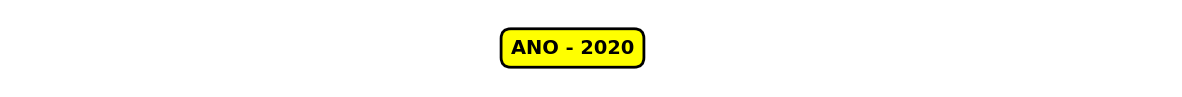

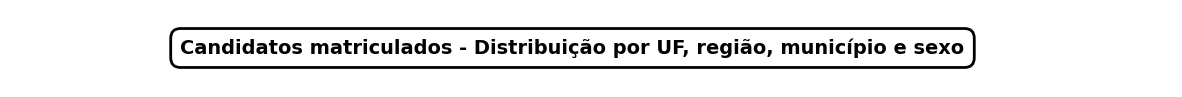

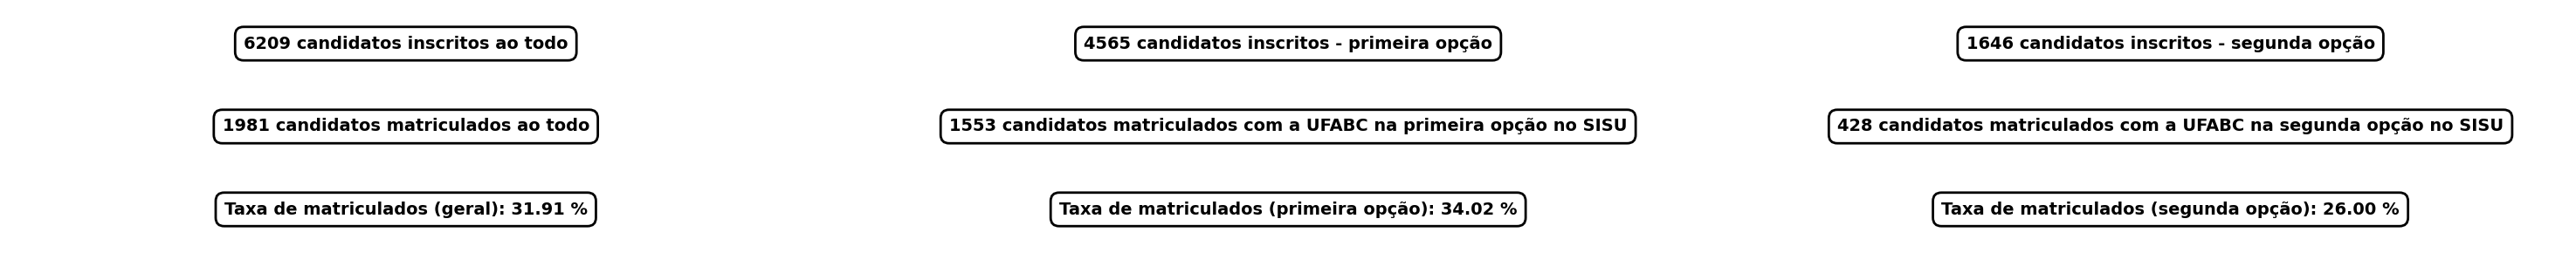

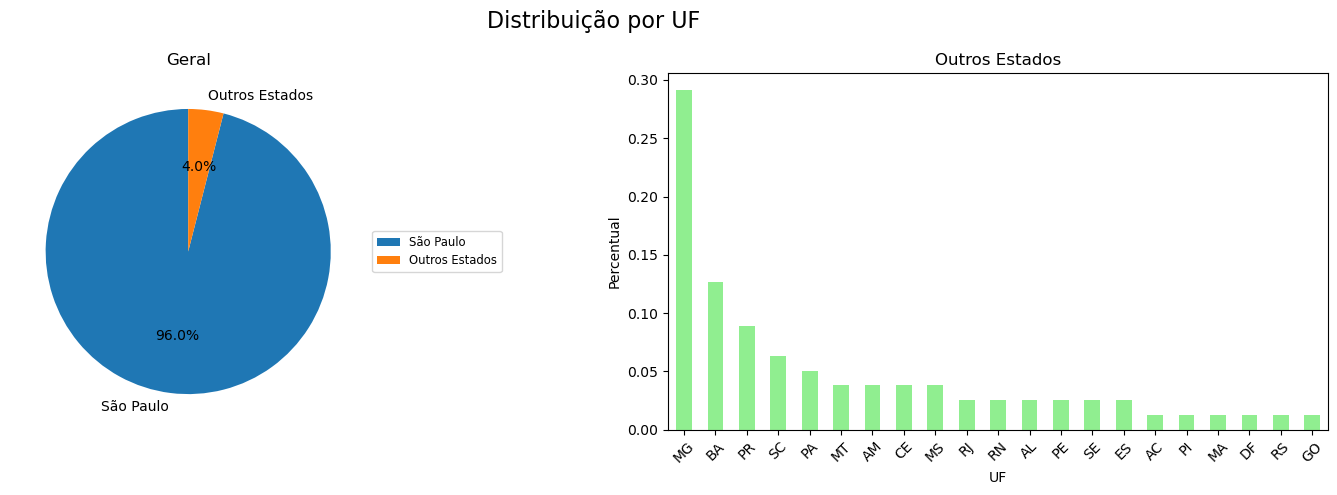

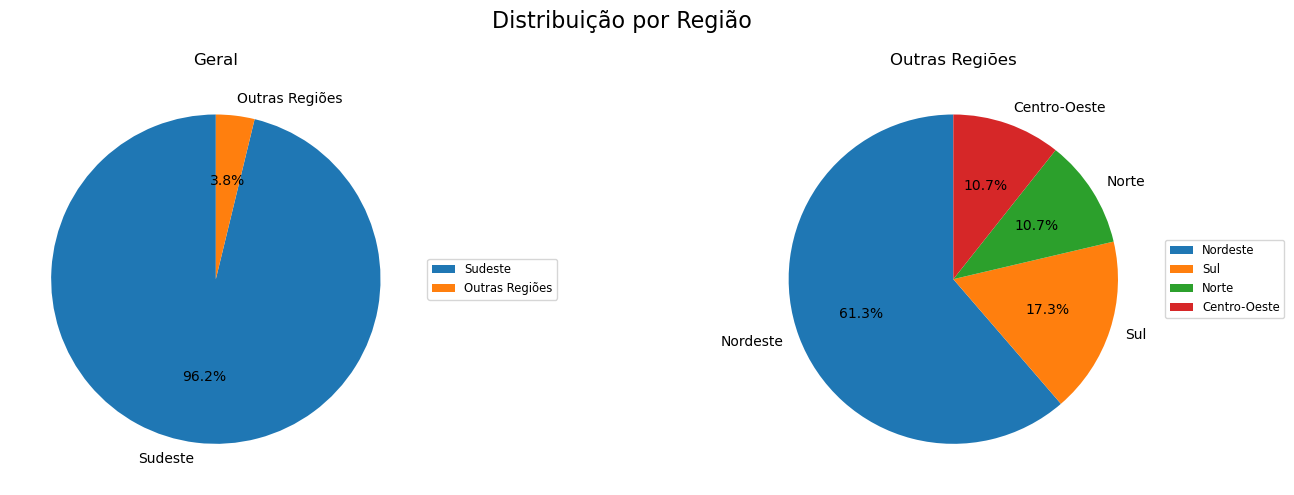

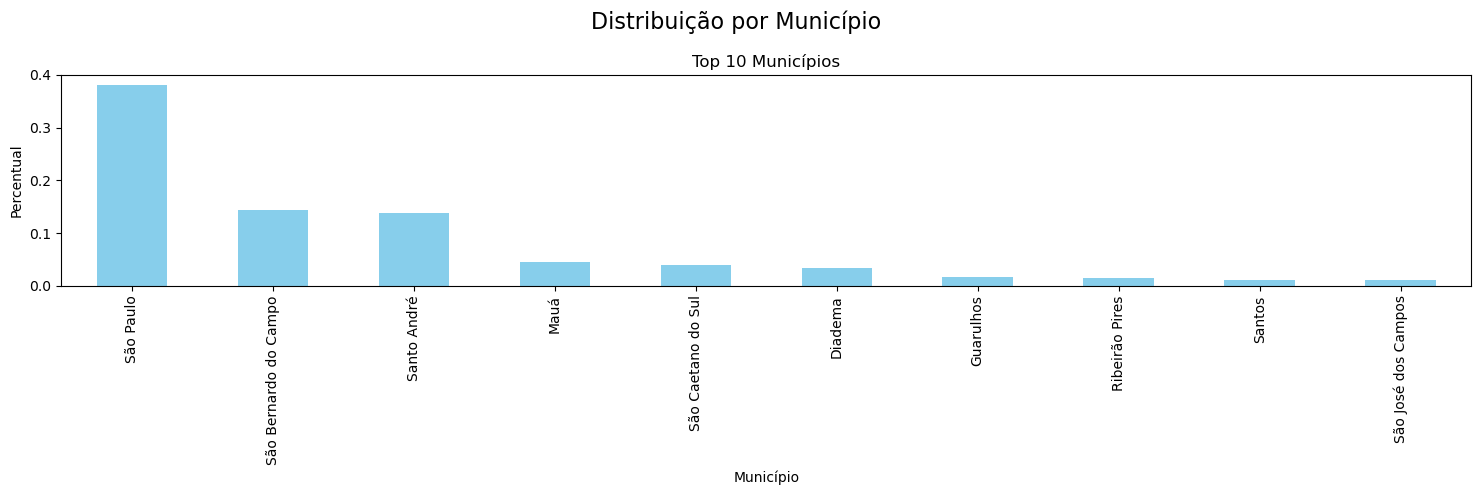

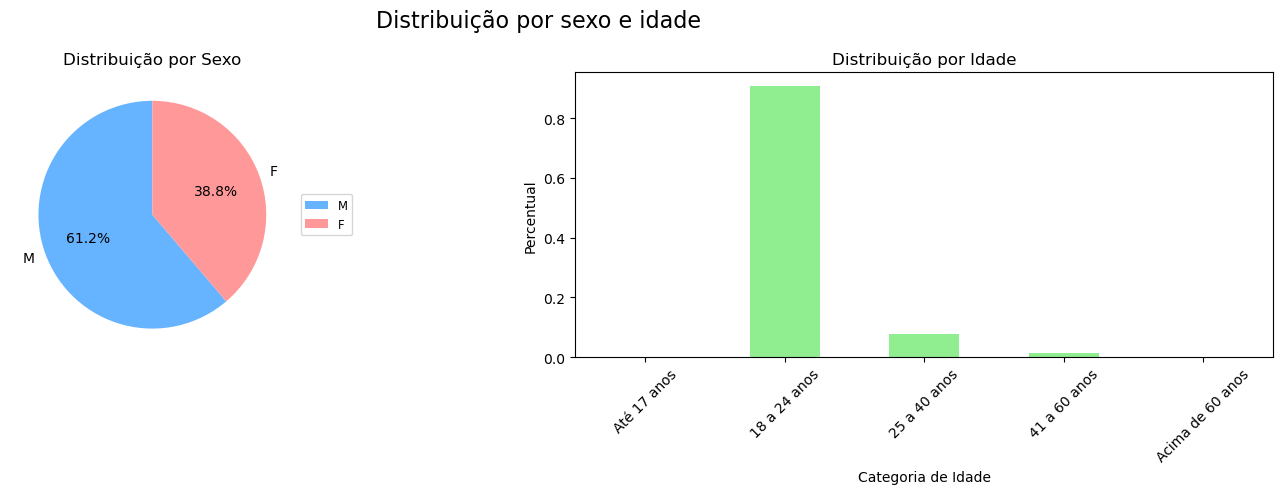

In [ ]:
# Definir ano e tipo de análise
analisa_perfil_candidatos(tipo='convocados')

##### Tabela de notas de corte

In [ ]:
# Criação da tabela de notas de corte
df_tabela_notas_corte = cria_tabela_notas_corte(df_base_final_limpa)

In [ ]:
# Candidatos convocados por ano
visualiza_tabela_notas_corte(
    df_tabela_notas_corte
    ).groupby(['ano do processo seletivo'])['nota corte'].median()

,nota corte
ano do processo seletivo,
2020,623.62
2021,640.98
2022,627.06
2023,625.08


In [ ]:
df_base_final_limpa[
    df_base_final_limpa['distribuicao_regiao'] == 'Sudeste'
].shape[0]

20689

In [ ]:
for i in df_base_final_limpa['status de matrícula'].unique():
    print(i)

Matriculado(a)
Não Compareceu
Cancelado(a)
Não Manifestou Interesse
Não Convocado(a)
Não Solicitou Matrícula
Matrícula Indeferida
Cancelamento
Indeferido(a)
Matrícula Cancelada
Convidado(a) p/ Cadastro Reserva


In [ ]:
df_base_final_limpa[df_base_final_limpa['ano do processo seletivo'] == 2022]['opção de curso'].unique()

array(['BACHARELADO EM CIÊNCIA E TECNOLOGIA',
       'BACHARELADO EM CIÊNCIAS E HUMANIDADES',
       'LICENCIATURA EM CIÊNCIAS HUMANAS',
       'LICENCIATURA EM CIÊNCIAS NATURAIS E EXATAS'], dtype=object)

- Fazer a validação das notas de corte obtidas usando as bases de dados disponibilizadas pela UFABC com as notas de corte disponíveis publicamente para consulta neste <a href="https://prograd.ufabc.edu.br/sisu/historico">site</a>

  - Com o objetivo de verificar possíveis inconsistências nos dados

  - Montar perfil através de diferenças regionais, perfis socioeconômicos, tipo de formação no Ensino Médio...

---

In [ ]:
candidatos_convocados_2021 = candidatos_convocados(2021, 'Ampla concorrência', 'BACHARELADO EM CIÊNCIA E TECNOLOGIA',
                                  'SANTO ANDRÉ', 'MATUTINO')

candidatos_convocados_2021.groupby(['UF_CANDIDATO', 'MUNICIPIO_CANDIDATO'], observed=True)['inscrição no ENEM'].count().sort_values(ascending=False)

In [ ]:
# Criação de uma coluna para indicar se o estudante matriculou ou não na UFABC
df_base_final_limpa['matriculou na ufabc'] = np.where(df_base_final_limpa['status de matrícula'] == 'Matriculado(a)',
                                                      1, 0)

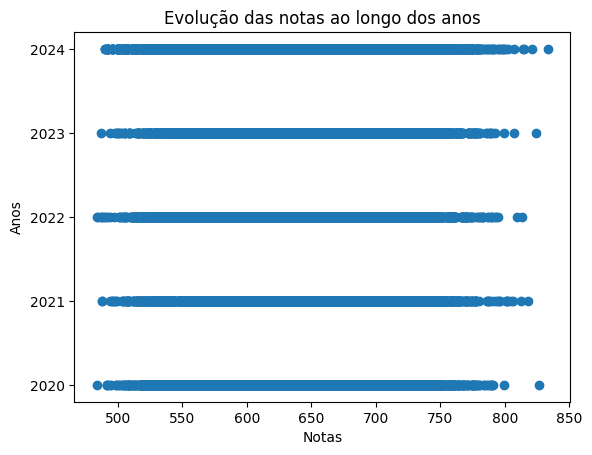

In [ ]:
# Plotando os dados brutos - distribuição das notas ao longo dos anos
plt.plot(df_base_final_limpa['nota'],
        df_base_final_limpa['ano do processo seletivo'], marker='o', linestyle='')
plt.xlabel('Notas')
plt.ylabel('Anos')
plt.yticks([2020, 2021, 2022, 2023, 2024])
plt.title('Evolução das notas ao longo dos anos')
plt.show()

# Pelos dados brutos, os alunos parecem ter performado pior no ano de 2020

In [ ]:
# A distribuição dos candidatos em cada ano foi igualitária?
for i in range(4):
    candidatos_ano_i = df_base_final_limpa[df_base_final_limpa['ano do processo seletivo'] == 2020 + i].shape[0]
    print(f"Ano {2020 + i}: {candidatos_ano_i} candidatos")

Ano 2020: 6213 candidatos
Ano 2021: 5395 candidatos
Ano 2022: 4959 candidatos
Ano 2023: 4800 candidatos


In [ ]:
# Visualizando cada uma das distribuições de notas
dataframes_por_ano = [
    (df_base_final_limpa[df_base_final_limpa['ano do processo seletivo'] == 2020], 2020),
    (df_base_final_limpa[df_base_final_limpa['ano do processo seletivo'] == 2021], 2021),
    (df_base_final_limpa[df_base_final_limpa['ano do processo seletivo'] == 2022], 2022),
    (df_base_final_limpa[df_base_final_limpa['ano do processo seletivo'] == 2023], 2023)
]

# Criar uma figura com subplots (2 linhas, 3 colunas)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12)) # Ajuste o tamanho da figura conforme necessário

# Achatando o array de eixos para iterar facilmente
axes = axes.flatten()

# Plotar um histograma com densidade e a curva KDE em cada subplot
for i, (df, ano) in enumerate(dataframes_por_ano):
    sns.histplot(data=df, x='nota', bins=30, edgecolor='black', ax=axes[i], stat='density') # Histograma com densidade
    sns.kdeplot(data=df, x='nota', ax=axes[i], common_norm=False) # Curva KDE
    axes[i].set_xlabel('Notas')
    axes[i].set_ylabel('Densidade de probabilidade') # O rótulo do eixo Y agora representa a densidade
    axes[i].set_title(f'Distribuição das Notas - Processo Seletivo {ano}')
    axes[i].grid(axis='y', alpha=0.75)

# Remover o subplot vazio se houver um número ímpar de gráficos (neste caso, haverá 1)
if len(dataframes_por_ano) < len(axes):
    for j in range(len(dataframes_por_ano), len(axes)):
        fig.delaxes(axes[j])


plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

# Pelo TCL, a distribuição das notas de cada ano parece seguir uma distribuição
# normal.

# Além disso, a média das notas parece ter caído bastante no ano de 2024

In [ ]:
# Médias calculadas considerando todas as modalidades de inscrição
# Desvios padrão populacionais - dispomos de toda a população, referente a cada ano
# e não a uma amostra

print(f'''* Processo seletivo 2020

Média das notas: {df_ingresso_ufabc_2020['nota'].mean():.2f}
Desvio padrão: {df_ingresso_ufabc_2020['nota'].std(ddof=0):.2f}''')

print(f'''\n* Processo seletivo 2021

Média das notas: {df_ingresso_ufabc_2021['nota'].mean():.2f}
Desvio padrão: {df_ingresso_ufabc_2021['nota'].std(ddof=0):.2f}''')

print(f'''\n* Processo seletivo 2022

Média das notas: {df_ingresso_ufabc_2022['nota'].mean():.2f}
Desvio padrão: {df_ingresso_ufabc_2022['nota'].std(ddof=0):.2f}''')

print(f'''\n* Processo seletivo 2023

Média das notas: {df_ingresso_ufabc_2023['nota'].mean():.2f}
Desvio padrão: {df_ingresso_ufabc_2023['nota'].std(ddof=0):.2f}''')

print(f'''\n* Processo seletivo 2024

Média das notas: {df_ingresso_ufabc_2024['nota'].mean():.2f}
Desvio padrão: {df_ingresso_ufabc_2024['nota'].std(ddof=0):.2f}''')

* Processo seletivo 2020

Média das notas: 643.92
Desvio padrão: 55.20

* Processo seletivo 2021

Média das notas: 647.94
Desvio padrão: 54.90

* Processo seletivo 2022

Média das notas: 643.07
Desvio padrão: 56.75

* Processo seletivo 2023

Média das notas: 648.14
Desvio padrão: 54.49

* Processo seletivo 2024

Média das notas: 630.23
Desvio padrão: 56.94
